In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Car:
    def __init__(self, car_id, position, speed, max_speed):
        self.car_id=car_id
        self.position=position
        self.speed=speed
        self.max_speed=max_speed

    def accelerate(self):
        if self.speed<self.max_speed:
            self.speed+=1

    def decelerate(self, headway_distance):
        if self.speed>headway_distance:
            self.speed=headway_distance # reduce speed equivalent only to headway distance

    def random_brake(self, randomization):
        if np.random.random()<randomization and self.speed>0:
            self.speed-=1

In [13]:
class Road1:
    def __init__(self, length, max_speed, randomization, production_prob):
        self.length=length #length of the road
        self.max_speed=max_speed #speed limit of the road
        self.randomization=randomization 
        self.next_car_id=1 #Initialize the next available car ID
        self.production_prob=production_prob
        self.cars=[] #empty array to denote empty road configuration at the start

    def headway_distance(self, car):
        #the next_car_position variable does these
        #First, it obtains the positions of all cars ahead of the reference car.
        #Second, the minimum position is obtained and subtracted to the reference car's position
        #Third, we put "-1" to take account of the space occupied by the car ahead
        #Fourth, the self.length is the default result to avoid ValueError in case no car is ahead
        next_car_position=min((v.position for v in self.cars if v.position>car.position), default=self.length)
        return next_car_position-car.position-1
    
    def update(self):
        new_cars=[] #road configuration for storing state of cars, replaces self.cars after update
        for car in self.cars: #iterates over each car in self.cars list
            headway_distance=self.headway_distance(car)#implements calculation of headway distance
            car.accelerate() #calls the accelerate method of the car to increase its speed
            car.decelerate(headway_distance) #calls the decelerate method of the car with input headway distance, which may reduce car speed based on headway distance
            new_position=car.position+car.speed #Forward Movement
            if new_position<self.length-1: #Check if the car will not reach the end
                car.position=new_position
                new_cars.append(car)
            else:
                car.position=Road2.cars[0] #Dapat yata sa Road 2 nakalagay yung receiving end
        self.cars=new_cars

        #Produce new cars
        if np.random.rand()<self.production_prob:
            new_car=Car(self.next_car_id, 0, np.random.randint(1, self.max_speed+1), self.max_speed)
            self.cars.append(new_car)
            self.next_car_id+=1 #increments of the next available car IDs
            
    def visualize(self):
        road_state=np.zeros(self.length) #Generates zeroz representing empty road configuration
        for car in self.cars:
            road_state[car.position]=1 #Assigns value of 1 for occupied positions
        plt.imshow(road_state.reshape(1,-1), cmap="binary", aspect="auto")
        plt.xticks(range(self.length))
        plt.yticks([])
        plt.title("One-Lane Road (Produce-Transfer)")
        plt.xlabel("Position")
        plt.show()

In [14]:
class Road2:
    def __init__(self, length, max_speed, randomization, production_prob):
        self.length=length #length of the road
        self.max_speed=max_speed #speed limit of the road
        self.randomization=randomization 
        self.next_car_id=1 #Initialize the next available car ID
        self.production_prob=production_prob
        self.cars=[] #empty array to denote empty road configuration at the start

    def headway_distance(self, car):
        #the next_car_position variable does these
        #First, it obtains the positions of all cars ahead of the reference car.
        #Second, the minimum position is obtained and subtracted to the reference car's position
        #Third, we put "-1" to take account of the space occupied by the car ahead
        #Fourth, the self.length is the default result to avoid ValueError in case no car is ahead
        next_car_position=min((v.position for v in self.cars if v.position>car.position), default=self.length)
        return next_car_position-car.position-1

    def remove_cars(self):
        self.cars = [car for car in self.cars if car.position!= self.length-1]
    
    def update(self):
        new_cars=[] #road configuration for storing state of cars, replaces self.cars after update
        for car in self.cars: #iterates over each car in self.cars list
            headway_distance=self.headway_distance(car)#implements calculation of headway distance
            car.accelerate() #calls the accelerate method of the car to increase its speed
            car.decelerate(headway_distance) #calls the decelerate method of the car with input headway distance, which may reduce car speed based on headway distance
            new_position=car.position+car.speed #Forward Movement
            if new_position<self.length-1: #Check if the car will not reach the end
                car.position=new_position
                new_cars.append(car)
        self.cars=new_cars

        #Change into accepting new cars from Road 1
        if np.random.rand()<self.production_prob:
            new_car=Car(self.next_car_id, 0, np.random.randint(1, self.max_speed+1), self.max_speed)
            self.cars.append(new_car)
            self.next_car_id+=1 #increments of the next available car IDs
            
        self.remove_cars()

    def visualize(self):
        road_state=np.zeros(self.length) #Generates zeroz representing empty road configuration
        for car in self.cars:
            road_state[car.position]=1 #Assigns value of 1 for occupied positions
        plt.imshow(road_state.reshape(1,-1), cmap="binary", aspect="auto")
        plt.xticks(range(self.length))
        plt.yticks([])
        plt.title("One-Lane Road (Transfer Evaporate)")
        plt.xlabel("Position")
        plt.show()

In [5]:
#Example Use
length=25
max_speed=5
randomization = 0.3
production_prob = 0.8
road_1 = Road1(length, max_speed, randomization, production_prob)
road_2 = Road2(length, max_speed, randomization, production_prob)

Time step: 1


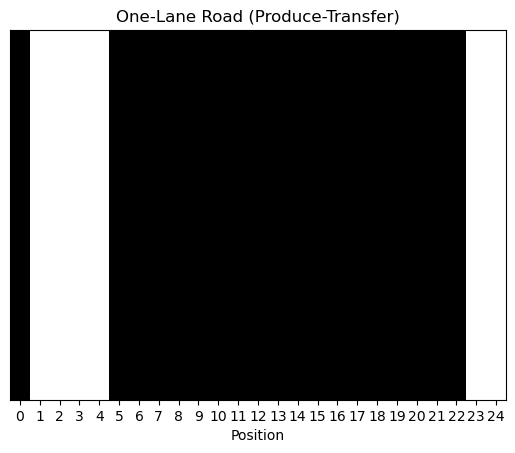

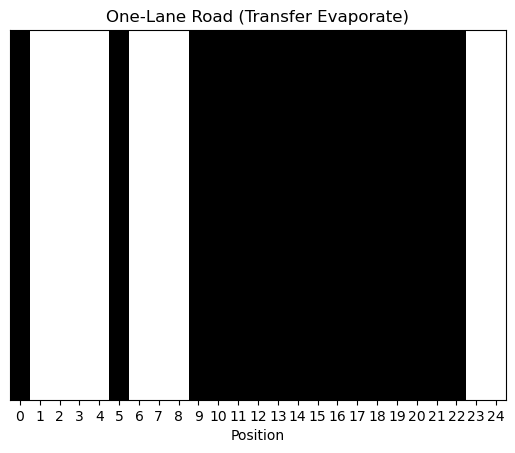

Cars:
ID: 25, Position: 21, Speed: 0
ID: 26, Position: 20, Speed: 0
ID: 27, Position: 19, Speed: 0
ID: 28, Position: 18, Speed: 0
ID: 29, Position: 17, Speed: 0
ID: 30, Position: 16, Speed: 0
ID: 31, Position: 15, Speed: 0
ID: 32, Position: 14, Speed: 0
ID: 33, Position: 13, Speed: 0
ID: 34, Position: 12, Speed: 0
ID: 35, Position: 11, Speed: 0
ID: 36, Position: 10, Speed: 0
ID: 37, Position: 9, Speed: 0
ID: 38, Position: 8, Speed: 0
ID: 39, Position: 7, Speed: 0
ID: 40, Position: 6, Speed: 0
ID: 41, Position: 5, Speed: 0
ID: 42, Position: 4, Speed: 4
ID: 43, Position: 0, Speed: 5
ID: 23, Position: 23, Speed: 1
ID: 24, Position: 22, Speed: 1
ID: 25, Position: 21, Speed: 1
ID: 26, Position: 20, Speed: 1
ID: 27, Position: 19, Speed: 1
ID: 28, Position: 18, Speed: 1
ID: 29, Position: 17, Speed: 1
ID: 30, Position: 16, Speed: 1
ID: 31, Position: 15, Speed: 1
ID: 32, Position: 14, Speed: 1
ID: 33, Position: 13, Speed: 1
ID: 34, Position: 12, Speed: 1
ID: 35, Position: 11, Speed: 1
ID: 36, P

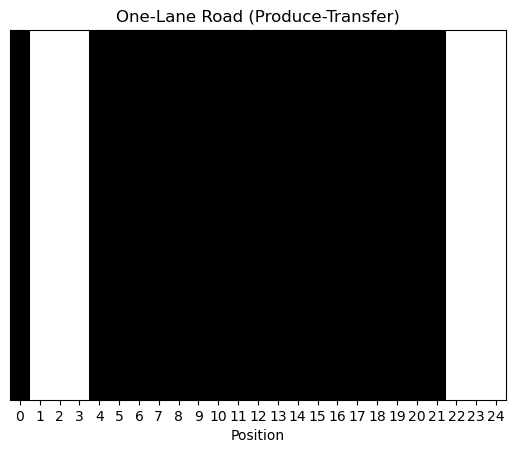

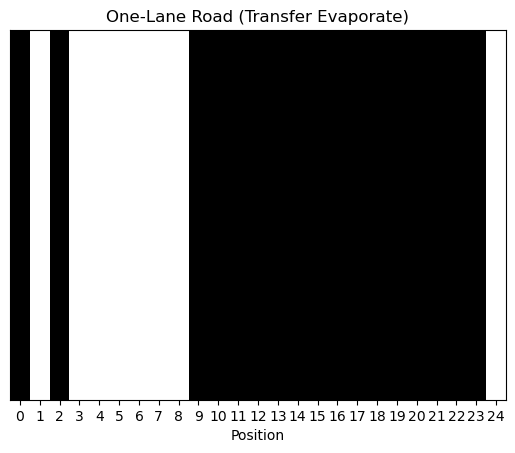

Cars:
ID: 25, Position: 22, Speed: 1
ID: 26, Position: 21, Speed: 1
ID: 27, Position: 20, Speed: 1
ID: 28, Position: 19, Speed: 1
ID: 29, Position: 18, Speed: 1
ID: 30, Position: 17, Speed: 1
ID: 31, Position: 16, Speed: 1
ID: 32, Position: 15, Speed: 1
ID: 33, Position: 14, Speed: 1
ID: 34, Position: 13, Speed: 1
ID: 35, Position: 12, Speed: 1
ID: 36, Position: 11, Speed: 1
ID: 37, Position: 10, Speed: 1
ID: 38, Position: 9, Speed: 1
ID: 39, Position: 8, Speed: 1
ID: 40, Position: 7, Speed: 1
ID: 41, Position: 6, Speed: 1
ID: 42, Position: 5, Speed: 1
ID: 43, Position: 4, Speed: 4
ID: 44, Position: 0, Speed: 4
ID: 24, Position: 22, Speed: 0
ID: 25, Position: 21, Speed: 0
ID: 26, Position: 20, Speed: 0
ID: 27, Position: 19, Speed: 0
ID: 28, Position: 18, Speed: 0
ID: 29, Position: 17, Speed: 0
ID: 30, Position: 16, Speed: 0
ID: 31, Position: 15, Speed: 0
ID: 32, Position: 14, Speed: 0
ID: 33, Position: 13, Speed: 0
ID: 34, Position: 12, Speed: 0
ID: 35, Position: 11, Speed: 0
ID: 36, P

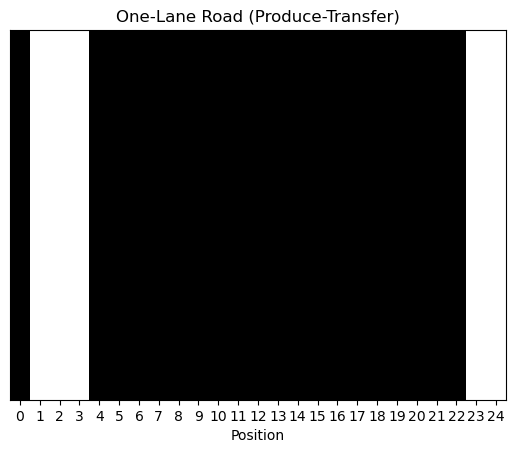

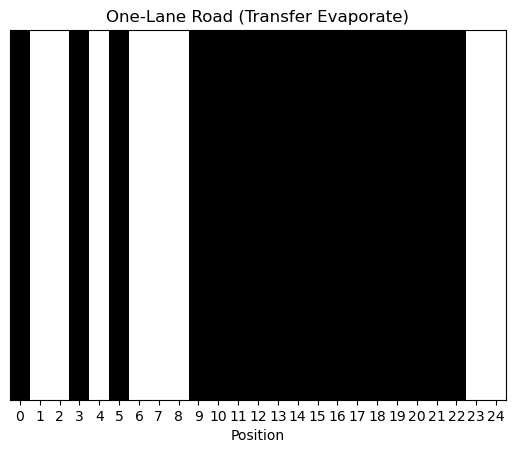

Cars:
ID: 26, Position: 21, Speed: 0
ID: 27, Position: 20, Speed: 0
ID: 28, Position: 19, Speed: 0
ID: 29, Position: 18, Speed: 0
ID: 30, Position: 17, Speed: 0
ID: 31, Position: 16, Speed: 0
ID: 32, Position: 15, Speed: 0
ID: 33, Position: 14, Speed: 0
ID: 34, Position: 13, Speed: 0
ID: 35, Position: 12, Speed: 0
ID: 36, Position: 11, Speed: 0
ID: 37, Position: 10, Speed: 0
ID: 38, Position: 9, Speed: 0
ID: 39, Position: 8, Speed: 0
ID: 40, Position: 7, Speed: 0
ID: 41, Position: 6, Speed: 0
ID: 42, Position: 5, Speed: 0
ID: 43, Position: 4, Speed: 0
ID: 44, Position: 3, Speed: 3
ID: 24, Position: 23, Speed: 1
ID: 25, Position: 22, Speed: 1
ID: 26, Position: 21, Speed: 1
ID: 27, Position: 20, Speed: 1
ID: 28, Position: 19, Speed: 1
ID: 29, Position: 18, Speed: 1
ID: 30, Position: 17, Speed: 1
ID: 31, Position: 16, Speed: 1
ID: 32, Position: 15, Speed: 1
ID: 33, Position: 14, Speed: 1
ID: 34, Position: 13, Speed: 1
ID: 35, Position: 12, Speed: 1
ID: 36, Position: 11, Speed: 1
ID: 37, P

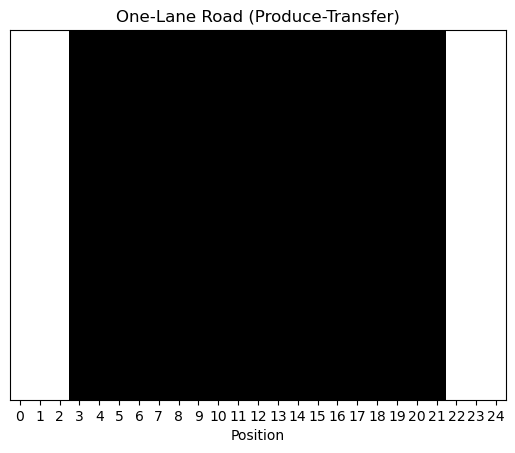

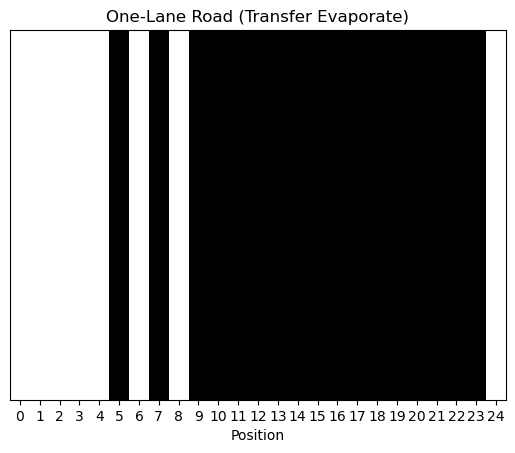

Cars:
ID: 26, Position: 22, Speed: 1
ID: 27, Position: 21, Speed: 1
ID: 28, Position: 20, Speed: 1
ID: 29, Position: 19, Speed: 1
ID: 30, Position: 18, Speed: 1
ID: 31, Position: 17, Speed: 1
ID: 32, Position: 16, Speed: 1
ID: 33, Position: 15, Speed: 1
ID: 34, Position: 14, Speed: 1
ID: 35, Position: 13, Speed: 1
ID: 36, Position: 12, Speed: 1
ID: 37, Position: 11, Speed: 1
ID: 38, Position: 10, Speed: 1
ID: 39, Position: 9, Speed: 1
ID: 40, Position: 8, Speed: 1
ID: 41, Position: 7, Speed: 1
ID: 42, Position: 6, Speed: 1
ID: 43, Position: 5, Speed: 1
ID: 44, Position: 4, Speed: 1
ID: 45, Position: 0, Speed: 1
ID: 25, Position: 22, Speed: 0
ID: 26, Position: 21, Speed: 0
ID: 27, Position: 20, Speed: 0
ID: 28, Position: 19, Speed: 0
ID: 29, Position: 18, Speed: 0
ID: 30, Position: 17, Speed: 0
ID: 31, Position: 16, Speed: 0
ID: 32, Position: 15, Speed: 0
ID: 33, Position: 14, Speed: 0
ID: 34, Position: 13, Speed: 0
ID: 35, Position: 12, Speed: 0
ID: 36, Position: 11, Speed: 0
ID: 37, P

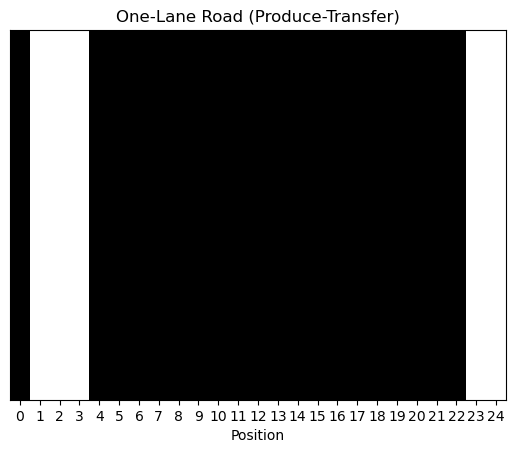

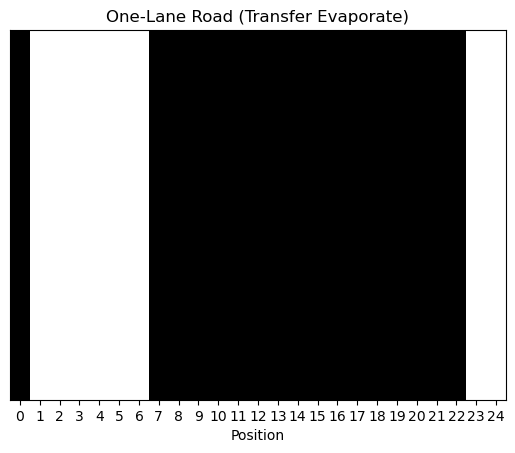

Cars:
ID: 27, Position: 21, Speed: 0
ID: 28, Position: 20, Speed: 0
ID: 29, Position: 19, Speed: 0
ID: 30, Position: 18, Speed: 0
ID: 31, Position: 17, Speed: 0
ID: 32, Position: 16, Speed: 0
ID: 33, Position: 15, Speed: 0
ID: 34, Position: 14, Speed: 0
ID: 35, Position: 13, Speed: 0
ID: 36, Position: 12, Speed: 0
ID: 37, Position: 11, Speed: 0
ID: 38, Position: 10, Speed: 0
ID: 39, Position: 9, Speed: 0
ID: 40, Position: 8, Speed: 0
ID: 41, Position: 7, Speed: 0
ID: 42, Position: 6, Speed: 0
ID: 43, Position: 5, Speed: 0
ID: 44, Position: 4, Speed: 0
ID: 45, Position: 2, Speed: 2
ID: 46, Position: 0, Speed: 5
ID: 25, Position: 23, Speed: 1
ID: 26, Position: 22, Speed: 1
ID: 27, Position: 21, Speed: 1
ID: 28, Position: 20, Speed: 1
ID: 29, Position: 19, Speed: 1
ID: 30, Position: 18, Speed: 1
ID: 31, Position: 17, Speed: 1
ID: 32, Position: 16, Speed: 1
ID: 33, Position: 15, Speed: 1
ID: 34, Position: 14, Speed: 1
ID: 35, Position: 13, Speed: 1
ID: 36, Position: 12, Speed: 1
ID: 37, Po

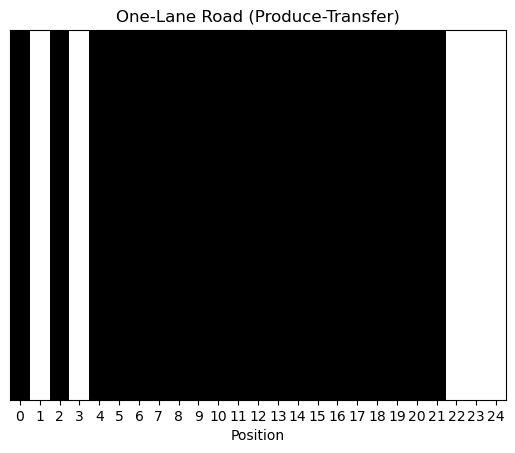

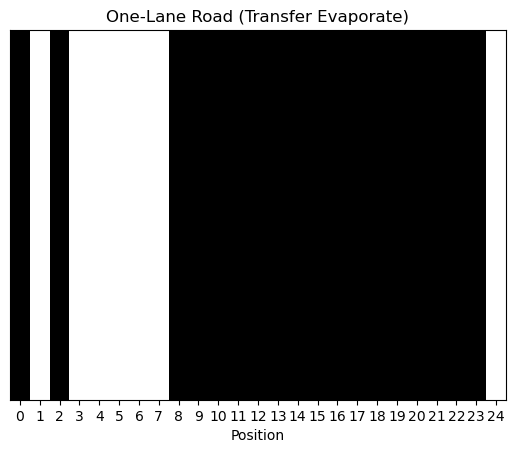

Cars:
ID: 27, Position: 22, Speed: 1
ID: 28, Position: 21, Speed: 1
ID: 29, Position: 20, Speed: 1
ID: 30, Position: 19, Speed: 1
ID: 31, Position: 18, Speed: 1
ID: 32, Position: 17, Speed: 1
ID: 33, Position: 16, Speed: 1
ID: 34, Position: 15, Speed: 1
ID: 35, Position: 14, Speed: 1
ID: 36, Position: 13, Speed: 1
ID: 37, Position: 12, Speed: 1
ID: 38, Position: 11, Speed: 1
ID: 39, Position: 10, Speed: 1
ID: 40, Position: 9, Speed: 1
ID: 41, Position: 8, Speed: 1
ID: 42, Position: 7, Speed: 1
ID: 43, Position: 6, Speed: 1
ID: 44, Position: 5, Speed: 1
ID: 45, Position: 4, Speed: 2
ID: 46, Position: 3, Speed: 3
ID: 47, Position: 0, Speed: 2
ID: 26, Position: 22, Speed: 0
ID: 27, Position: 21, Speed: 0
ID: 28, Position: 20, Speed: 0
ID: 29, Position: 19, Speed: 0
ID: 30, Position: 18, Speed: 0
ID: 31, Position: 17, Speed: 0
ID: 32, Position: 16, Speed: 0
ID: 33, Position: 15, Speed: 0
ID: 34, Position: 14, Speed: 0
ID: 35, Position: 13, Speed: 0
ID: 36, Position: 12, Speed: 0
ID: 37, Po

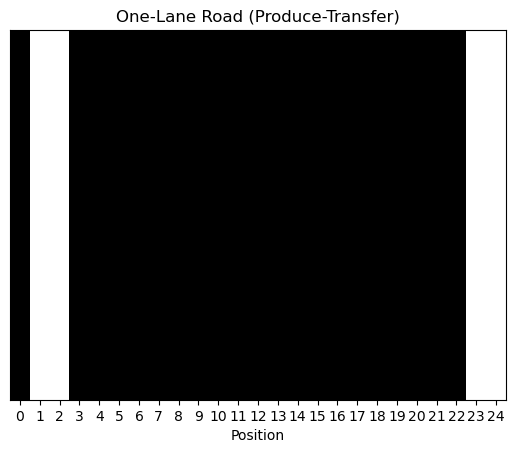

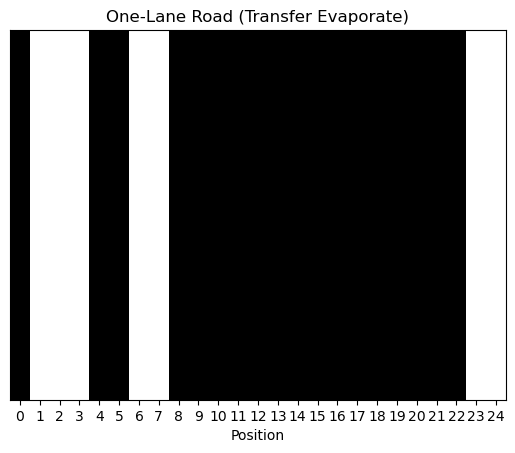

Cars:
ID: 28, Position: 21, Speed: 0
ID: 29, Position: 20, Speed: 0
ID: 30, Position: 19, Speed: 0
ID: 31, Position: 18, Speed: 0
ID: 32, Position: 17, Speed: 0
ID: 33, Position: 16, Speed: 0
ID: 34, Position: 15, Speed: 0
ID: 35, Position: 14, Speed: 0
ID: 36, Position: 13, Speed: 0
ID: 37, Position: 12, Speed: 0
ID: 38, Position: 11, Speed: 0
ID: 39, Position: 10, Speed: 0
ID: 40, Position: 9, Speed: 0
ID: 41, Position: 8, Speed: 0
ID: 42, Position: 7, Speed: 0
ID: 43, Position: 6, Speed: 0
ID: 44, Position: 5, Speed: 0
ID: 45, Position: 4, Speed: 0
ID: 46, Position: 3, Speed: 0
ID: 47, Position: 2, Speed: 2
ID: 48, Position: 0, Speed: 1
ID: 26, Position: 23, Speed: 1
ID: 27, Position: 22, Speed: 1
ID: 28, Position: 21, Speed: 1
ID: 29, Position: 20, Speed: 1
ID: 30, Position: 19, Speed: 1
ID: 31, Position: 18, Speed: 1
ID: 32, Position: 17, Speed: 1
ID: 33, Position: 16, Speed: 1
ID: 34, Position: 15, Speed: 1
ID: 35, Position: 14, Speed: 1
ID: 36, Position: 13, Speed: 1
ID: 37, Pos

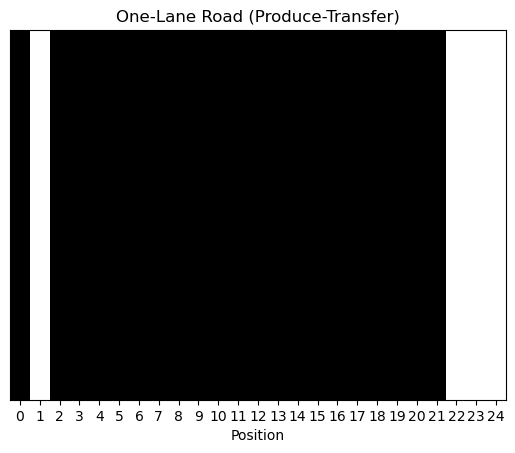

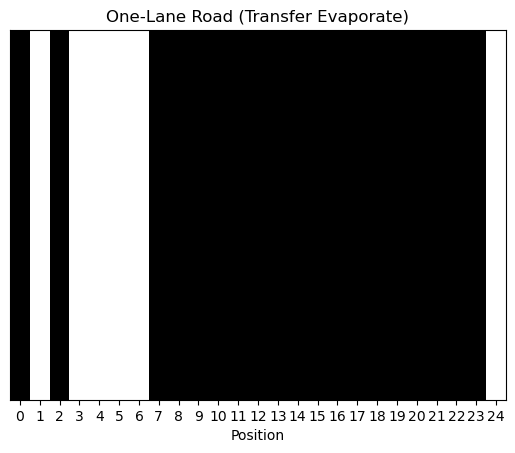

Cars:
ID: 28, Position: 22, Speed: 1
ID: 29, Position: 21, Speed: 1
ID: 30, Position: 20, Speed: 1
ID: 31, Position: 19, Speed: 1
ID: 32, Position: 18, Speed: 1
ID: 33, Position: 17, Speed: 1
ID: 34, Position: 16, Speed: 1
ID: 35, Position: 15, Speed: 1
ID: 36, Position: 14, Speed: 1
ID: 37, Position: 13, Speed: 1
ID: 38, Position: 12, Speed: 1
ID: 39, Position: 11, Speed: 1
ID: 40, Position: 10, Speed: 1
ID: 41, Position: 9, Speed: 1
ID: 42, Position: 8, Speed: 1
ID: 43, Position: 7, Speed: 1
ID: 44, Position: 6, Speed: 1
ID: 45, Position: 5, Speed: 1
ID: 46, Position: 4, Speed: 1
ID: 47, Position: 3, Speed: 1
ID: 48, Position: 2, Speed: 2
ID: 49, Position: 0, Speed: 5
ID: 27, Position: 22, Speed: 0
ID: 28, Position: 21, Speed: 0
ID: 29, Position: 20, Speed: 0
ID: 30, Position: 19, Speed: 0
ID: 31, Position: 18, Speed: 0
ID: 32, Position: 17, Speed: 0
ID: 33, Position: 16, Speed: 0
ID: 34, Position: 15, Speed: 0
ID: 35, Position: 14, Speed: 0
ID: 36, Position: 13, Speed: 0
ID: 37, Pos

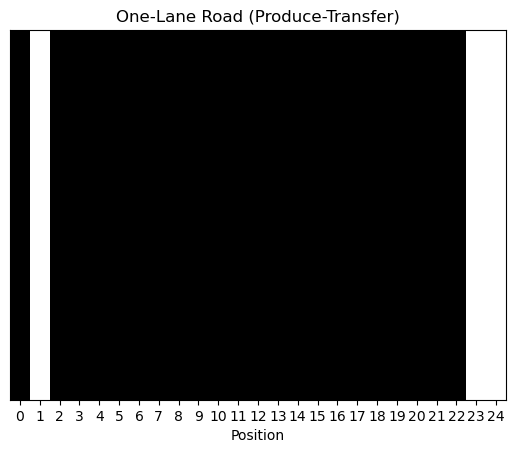

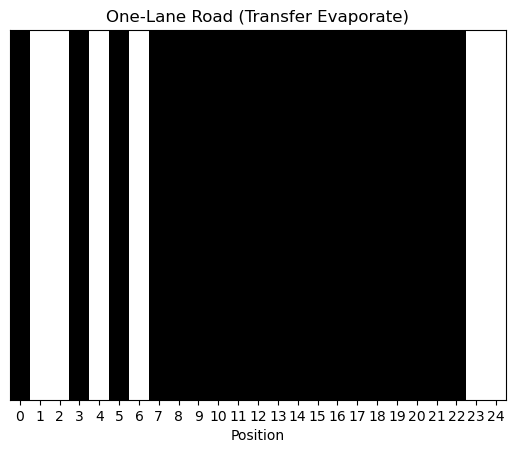

Cars:
ID: 29, Position: 21, Speed: 0
ID: 30, Position: 20, Speed: 0
ID: 31, Position: 19, Speed: 0
ID: 32, Position: 18, Speed: 0
ID: 33, Position: 17, Speed: 0
ID: 34, Position: 16, Speed: 0
ID: 35, Position: 15, Speed: 0
ID: 36, Position: 14, Speed: 0
ID: 37, Position: 13, Speed: 0
ID: 38, Position: 12, Speed: 0
ID: 39, Position: 11, Speed: 0
ID: 40, Position: 10, Speed: 0
ID: 41, Position: 9, Speed: 0
ID: 42, Position: 8, Speed: 0
ID: 43, Position: 7, Speed: 0
ID: 44, Position: 6, Speed: 0
ID: 45, Position: 5, Speed: 0
ID: 46, Position: 4, Speed: 0
ID: 47, Position: 3, Speed: 0
ID: 48, Position: 2, Speed: 0
ID: 49, Position: 1, Speed: 1
ID: 50, Position: 0, Speed: 2
ID: 27, Position: 23, Speed: 1
ID: 28, Position: 22, Speed: 1
ID: 29, Position: 21, Speed: 1
ID: 30, Position: 20, Speed: 1
ID: 31, Position: 19, Speed: 1
ID: 32, Position: 18, Speed: 1
ID: 33, Position: 17, Speed: 1
ID: 34, Position: 16, Speed: 1
ID: 35, Position: 15, Speed: 1
ID: 36, Position: 14, Speed: 1
ID: 37, Posi

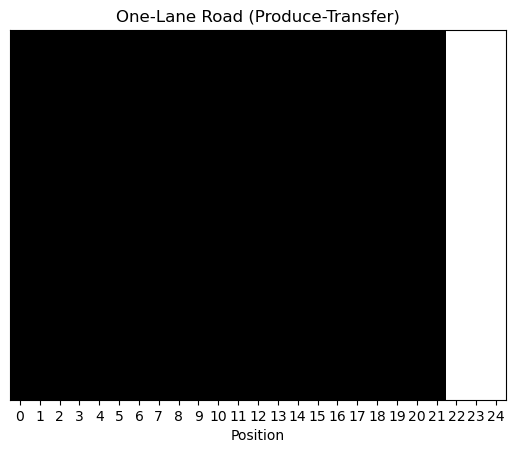

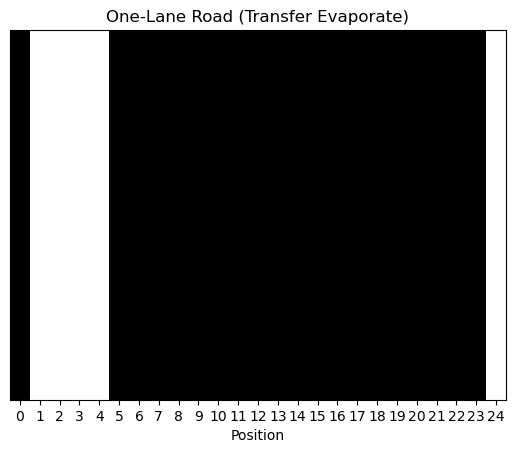

Cars:
ID: 29, Position: 22, Speed: 1
ID: 30, Position: 21, Speed: 1
ID: 31, Position: 20, Speed: 1
ID: 32, Position: 19, Speed: 1
ID: 33, Position: 18, Speed: 1
ID: 34, Position: 17, Speed: 1
ID: 35, Position: 16, Speed: 1
ID: 36, Position: 15, Speed: 1
ID: 37, Position: 14, Speed: 1
ID: 38, Position: 13, Speed: 1
ID: 39, Position: 12, Speed: 1
ID: 40, Position: 11, Speed: 1
ID: 41, Position: 10, Speed: 1
ID: 42, Position: 9, Speed: 1
ID: 43, Position: 8, Speed: 1
ID: 44, Position: 7, Speed: 1
ID: 45, Position: 6, Speed: 1
ID: 46, Position: 5, Speed: 1
ID: 47, Position: 4, Speed: 1
ID: 48, Position: 3, Speed: 1
ID: 49, Position: 2, Speed: 1
ID: 50, Position: 1, Speed: 1
ID: 28, Position: 22, Speed: 0
ID: 29, Position: 21, Speed: 0
ID: 30, Position: 20, Speed: 0
ID: 31, Position: 19, Speed: 0
ID: 32, Position: 18, Speed: 0
ID: 33, Position: 17, Speed: 0
ID: 34, Position: 16, Speed: 0
ID: 35, Position: 15, Speed: 0
ID: 36, Position: 14, Speed: 0
ID: 37, Position: 13, Speed: 0
ID: 38, Pos

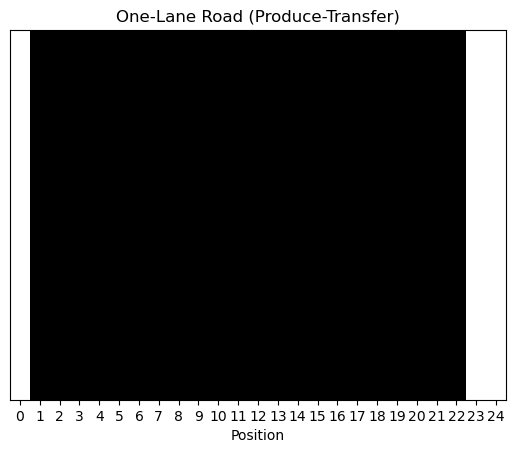

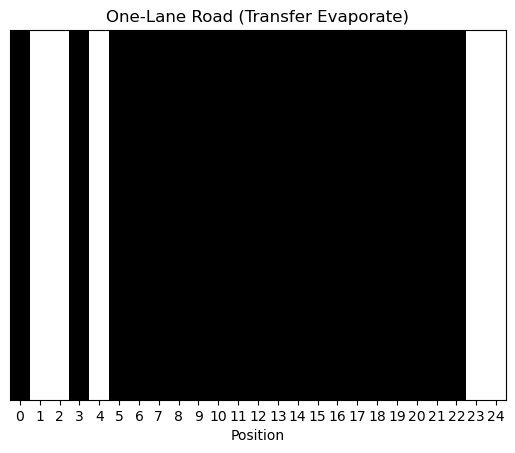

Cars:
ID: 30, Position: 21, Speed: 0
ID: 31, Position: 20, Speed: 0
ID: 32, Position: 19, Speed: 0
ID: 33, Position: 18, Speed: 0
ID: 34, Position: 17, Speed: 0
ID: 35, Position: 16, Speed: 0
ID: 36, Position: 15, Speed: 0
ID: 37, Position: 14, Speed: 0
ID: 38, Position: 13, Speed: 0
ID: 39, Position: 12, Speed: 0
ID: 40, Position: 11, Speed: 0
ID: 41, Position: 10, Speed: 0
ID: 42, Position: 9, Speed: 0
ID: 43, Position: 8, Speed: 0
ID: 44, Position: 7, Speed: 0
ID: 45, Position: 6, Speed: 0
ID: 46, Position: 5, Speed: 0
ID: 47, Position: 4, Speed: 0
ID: 48, Position: 3, Speed: 0
ID: 49, Position: 2, Speed: 0
ID: 50, Position: 1, Speed: 0
ID: 51, Position: 0, Speed: 4
ID: 28, Position: 23, Speed: 1
ID: 29, Position: 22, Speed: 1
ID: 30, Position: 21, Speed: 1
ID: 31, Position: 20, Speed: 1
ID: 32, Position: 19, Speed: 1
ID: 33, Position: 18, Speed: 1
ID: 34, Position: 17, Speed: 1
ID: 35, Position: 16, Speed: 1
ID: 36, Position: 15, Speed: 1
ID: 37, Position: 14, Speed: 1
ID: 38, Posi

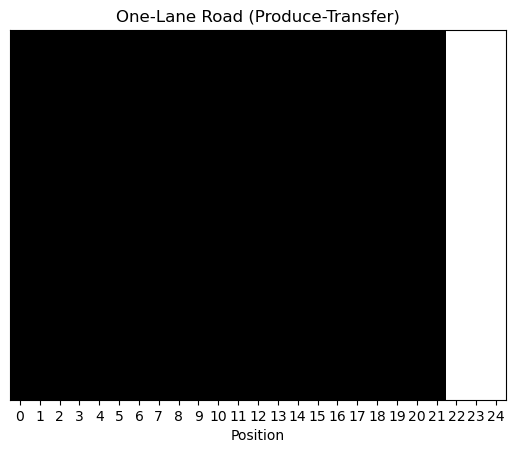

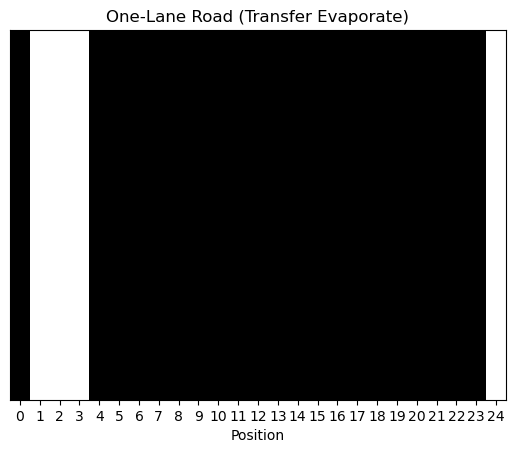

Cars:
ID: 30, Position: 22, Speed: 1
ID: 31, Position: 21, Speed: 1
ID: 32, Position: 20, Speed: 1
ID: 33, Position: 19, Speed: 1
ID: 34, Position: 18, Speed: 1
ID: 35, Position: 17, Speed: 1
ID: 36, Position: 16, Speed: 1
ID: 37, Position: 15, Speed: 1
ID: 38, Position: 14, Speed: 1
ID: 39, Position: 13, Speed: 1
ID: 40, Position: 12, Speed: 1
ID: 41, Position: 11, Speed: 1
ID: 42, Position: 10, Speed: 1
ID: 43, Position: 9, Speed: 1
ID: 44, Position: 8, Speed: 1
ID: 45, Position: 7, Speed: 1
ID: 46, Position: 6, Speed: 1
ID: 47, Position: 5, Speed: 1
ID: 48, Position: 4, Speed: 1
ID: 49, Position: 3, Speed: 1
ID: 50, Position: 2, Speed: 1
ID: 51, Position: 1, Speed: 1
ID: 52, Position: 0, Speed: 3
ID: 29, Position: 22, Speed: 0
ID: 30, Position: 21, Speed: 0
ID: 31, Position: 20, Speed: 0
ID: 32, Position: 19, Speed: 0
ID: 33, Position: 18, Speed: 0
ID: 34, Position: 17, Speed: 0
ID: 35, Position: 16, Speed: 0
ID: 36, Position: 15, Speed: 0
ID: 37, Position: 14, Speed: 0
ID: 38, Posi

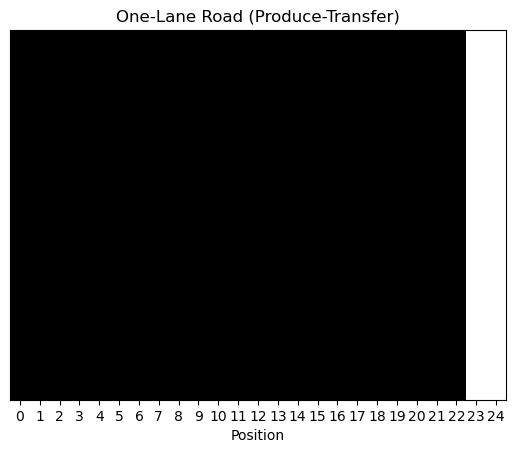

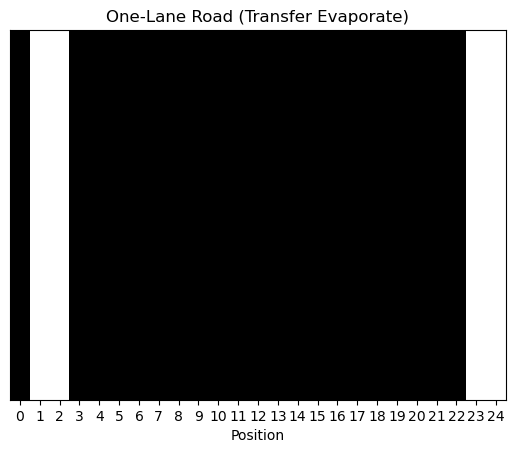

Cars:
ID: 31, Position: 21, Speed: 0
ID: 32, Position: 20, Speed: 0
ID: 33, Position: 19, Speed: 0
ID: 34, Position: 18, Speed: 0
ID: 35, Position: 17, Speed: 0
ID: 36, Position: 16, Speed: 0
ID: 37, Position: 15, Speed: 0
ID: 38, Position: 14, Speed: 0
ID: 39, Position: 13, Speed: 0
ID: 40, Position: 12, Speed: 0
ID: 41, Position: 11, Speed: 0
ID: 42, Position: 10, Speed: 0
ID: 43, Position: 9, Speed: 0
ID: 44, Position: 8, Speed: 0
ID: 45, Position: 7, Speed: 0
ID: 46, Position: 6, Speed: 0
ID: 47, Position: 5, Speed: 0
ID: 48, Position: 4, Speed: 0
ID: 49, Position: 3, Speed: 0
ID: 50, Position: 2, Speed: 0
ID: 51, Position: 1, Speed: 0
ID: 52, Position: 0, Speed: 0
ID: 53, Position: 0, Speed: 4
ID: 29, Position: 23, Speed: 1
ID: 30, Position: 22, Speed: 1
ID: 31, Position: 21, Speed: 1
ID: 32, Position: 20, Speed: 1
ID: 33, Position: 19, Speed: 1
ID: 34, Position: 18, Speed: 1
ID: 35, Position: 17, Speed: 1
ID: 36, Position: 16, Speed: 1
ID: 37, Position: 15, Speed: 1
ID: 38, Posit

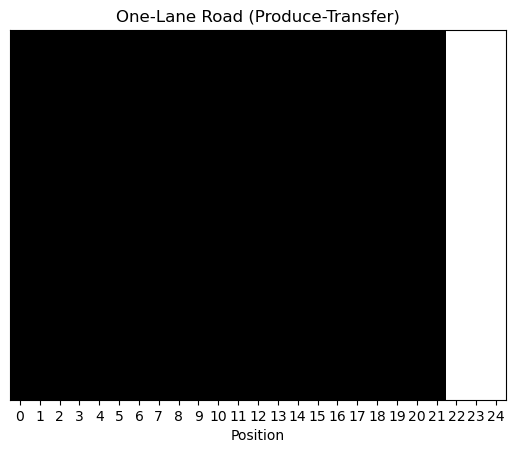

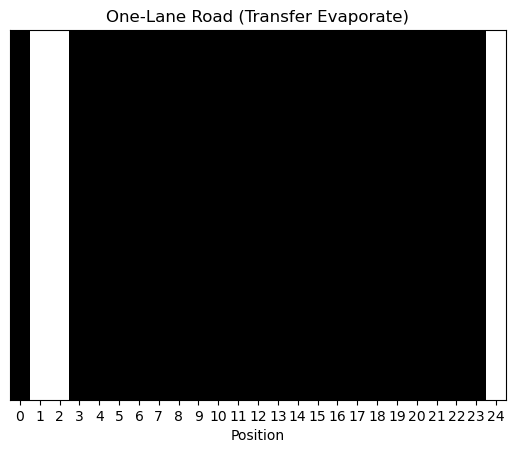

Cars:
ID: 31, Position: 22, Speed: 1
ID: 32, Position: 21, Speed: 1
ID: 33, Position: 20, Speed: 1
ID: 34, Position: 19, Speed: 1
ID: 35, Position: 18, Speed: 1
ID: 36, Position: 17, Speed: 1
ID: 37, Position: 16, Speed: 1
ID: 38, Position: 15, Speed: 1
ID: 39, Position: 14, Speed: 1
ID: 40, Position: 13, Speed: 1
ID: 41, Position: 12, Speed: 1
ID: 42, Position: 11, Speed: 1
ID: 43, Position: 10, Speed: 1
ID: 44, Position: 9, Speed: 1
ID: 45, Position: 8, Speed: 1
ID: 46, Position: 7, Speed: 1
ID: 47, Position: 6, Speed: 1
ID: 48, Position: 5, Speed: 1
ID: 49, Position: 4, Speed: 1
ID: 50, Position: 3, Speed: 1
ID: 51, Position: 2, Speed: 1
ID: 52, Position: 1, Speed: 1
ID: 53, Position: 0, Speed: 0
ID: 30, Position: 22, Speed: 0
ID: 31, Position: 21, Speed: 0
ID: 32, Position: 20, Speed: 0
ID: 33, Position: 19, Speed: 0
ID: 34, Position: 18, Speed: 0
ID: 35, Position: 17, Speed: 0
ID: 36, Position: 16, Speed: 0
ID: 37, Position: 15, Speed: 0
ID: 38, Position: 14, Speed: 0
ID: 39, Posi

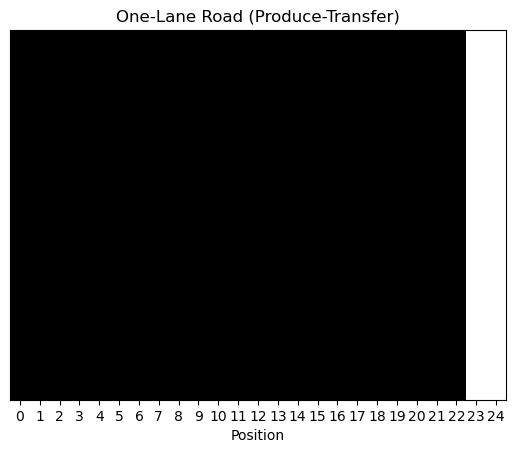

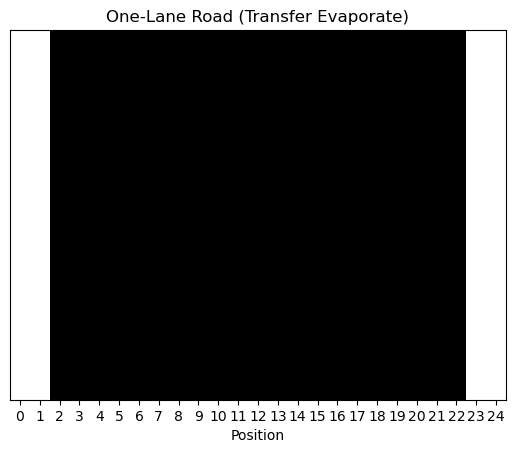

Cars:
ID: 32, Position: 21, Speed: 0
ID: 33, Position: 20, Speed: 0
ID: 34, Position: 19, Speed: 0
ID: 35, Position: 18, Speed: 0
ID: 36, Position: 17, Speed: 0
ID: 37, Position: 16, Speed: 0
ID: 38, Position: 15, Speed: 0
ID: 39, Position: 14, Speed: 0
ID: 40, Position: 13, Speed: 0
ID: 41, Position: 12, Speed: 0
ID: 42, Position: 11, Speed: 0
ID: 43, Position: 10, Speed: 0
ID: 44, Position: 9, Speed: 0
ID: 45, Position: 8, Speed: 0
ID: 46, Position: 7, Speed: 0
ID: 47, Position: 6, Speed: 0
ID: 48, Position: 5, Speed: 0
ID: 49, Position: 4, Speed: 0
ID: 50, Position: 3, Speed: 0
ID: 51, Position: 2, Speed: 0
ID: 52, Position: 1, Speed: 0
ID: 53, Position: 0, Speed: 0
ID: 54, Position: 0, Speed: 5
ID: 30, Position: 23, Speed: 1
ID: 31, Position: 22, Speed: 1
ID: 32, Position: 21, Speed: 1
ID: 33, Position: 20, Speed: 1
ID: 34, Position: 19, Speed: 1
ID: 35, Position: 18, Speed: 1
ID: 36, Position: 17, Speed: 1
ID: 37, Position: 16, Speed: 1
ID: 38, Position: 15, Speed: 1
ID: 39, Posit

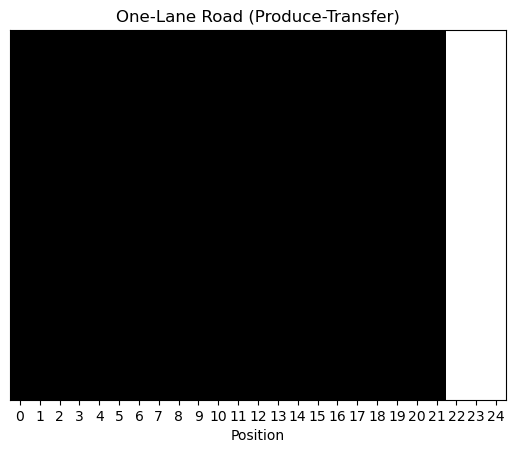

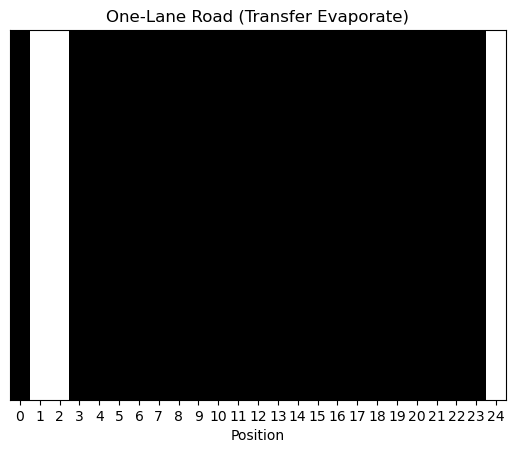

Cars:
ID: 32, Position: 22, Speed: 1
ID: 33, Position: 21, Speed: 1
ID: 34, Position: 20, Speed: 1
ID: 35, Position: 19, Speed: 1
ID: 36, Position: 18, Speed: 1
ID: 37, Position: 17, Speed: 1
ID: 38, Position: 16, Speed: 1
ID: 39, Position: 15, Speed: 1
ID: 40, Position: 14, Speed: 1
ID: 41, Position: 13, Speed: 1
ID: 42, Position: 12, Speed: 1
ID: 43, Position: 11, Speed: 1
ID: 44, Position: 10, Speed: 1
ID: 45, Position: 9, Speed: 1
ID: 46, Position: 8, Speed: 1
ID: 47, Position: 7, Speed: 1
ID: 48, Position: 6, Speed: 1
ID: 49, Position: 5, Speed: 1
ID: 50, Position: 4, Speed: 1
ID: 51, Position: 3, Speed: 1
ID: 52, Position: 2, Speed: 1
ID: 53, Position: 1, Speed: 1
ID: 54, Position: 0, Speed: 0
ID: 55, Position: 0, Speed: 5
ID: 31, Position: 22, Speed: 0
ID: 32, Position: 21, Speed: 0
ID: 33, Position: 20, Speed: 0
ID: 34, Position: 19, Speed: 0
ID: 35, Position: 18, Speed: 0
ID: 36, Position: 17, Speed: 0
ID: 37, Position: 16, Speed: 0
ID: 38, Position: 15, Speed: 0
ID: 39, Posit

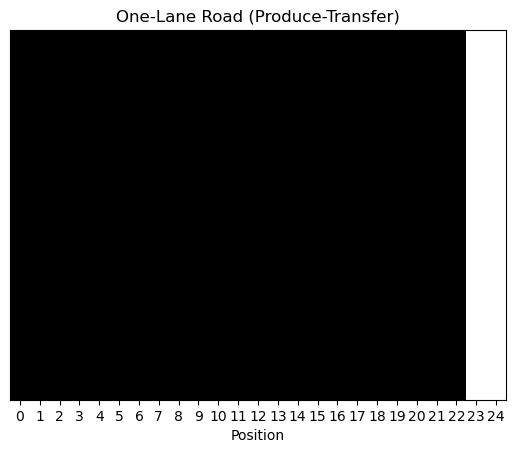

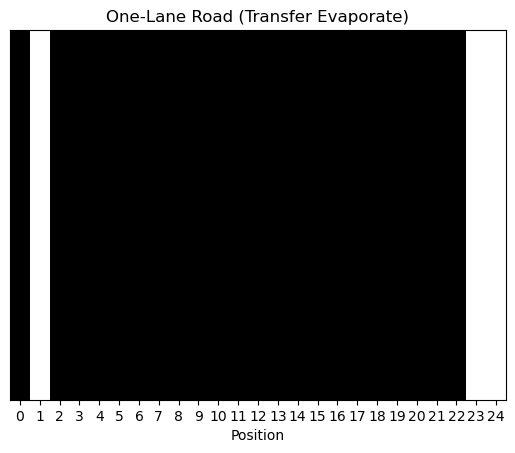

Cars:
ID: 33, Position: 21, Speed: 0
ID: 34, Position: 20, Speed: 0
ID: 35, Position: 19, Speed: 0
ID: 36, Position: 18, Speed: 0
ID: 37, Position: 17, Speed: 0
ID: 38, Position: 16, Speed: 0
ID: 39, Position: 15, Speed: 0
ID: 40, Position: 14, Speed: 0
ID: 41, Position: 13, Speed: 0
ID: 42, Position: 12, Speed: 0
ID: 43, Position: 11, Speed: 0
ID: 44, Position: 10, Speed: 0
ID: 45, Position: 9, Speed: 0
ID: 46, Position: 8, Speed: 0
ID: 47, Position: 7, Speed: 0
ID: 48, Position: 6, Speed: 0
ID: 49, Position: 5, Speed: 0
ID: 50, Position: 4, Speed: 0
ID: 51, Position: 3, Speed: 0
ID: 52, Position: 2, Speed: 0
ID: 53, Position: 1, Speed: 0
ID: 54, Position: 0, Speed: 0
ID: 55, Position: 0, Speed: 0
ID: 56, Position: 0, Speed: 1
ID: 31, Position: 23, Speed: 1
ID: 32, Position: 22, Speed: 1
ID: 33, Position: 21, Speed: 1
ID: 34, Position: 20, Speed: 1
ID: 35, Position: 19, Speed: 1
ID: 36, Position: 18, Speed: 1
ID: 37, Position: 17, Speed: 1
ID: 38, Position: 16, Speed: 1
ID: 39, Positi

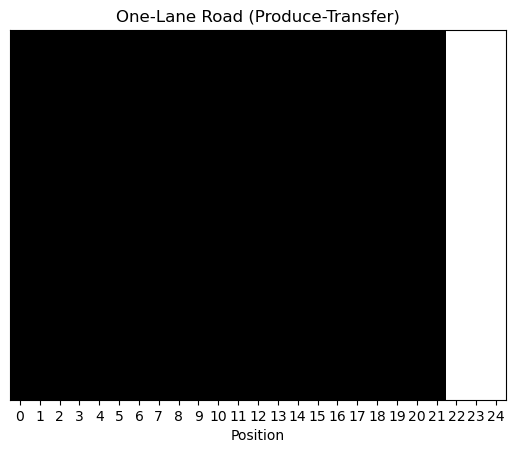

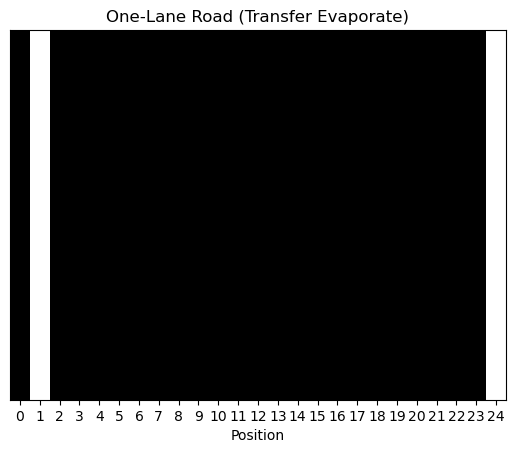

Cars:
ID: 33, Position: 22, Speed: 1
ID: 34, Position: 21, Speed: 1
ID: 35, Position: 20, Speed: 1
ID: 36, Position: 19, Speed: 1
ID: 37, Position: 18, Speed: 1
ID: 38, Position: 17, Speed: 1
ID: 39, Position: 16, Speed: 1
ID: 40, Position: 15, Speed: 1
ID: 41, Position: 14, Speed: 1
ID: 42, Position: 13, Speed: 1
ID: 43, Position: 12, Speed: 1
ID: 44, Position: 11, Speed: 1
ID: 45, Position: 10, Speed: 1
ID: 46, Position: 9, Speed: 1
ID: 47, Position: 8, Speed: 1
ID: 48, Position: 7, Speed: 1
ID: 49, Position: 6, Speed: 1
ID: 50, Position: 5, Speed: 1
ID: 51, Position: 4, Speed: 1
ID: 52, Position: 3, Speed: 1
ID: 53, Position: 2, Speed: 1
ID: 54, Position: 1, Speed: 1
ID: 55, Position: 0, Speed: 0
ID: 56, Position: 0, Speed: 0
ID: 57, Position: 0, Speed: 4
ID: 32, Position: 22, Speed: 0
ID: 33, Position: 21, Speed: 0
ID: 34, Position: 20, Speed: 0
ID: 35, Position: 19, Speed: 0
ID: 36, Position: 18, Speed: 0
ID: 37, Position: 17, Speed: 0
ID: 38, Position: 16, Speed: 0
ID: 39, Positi

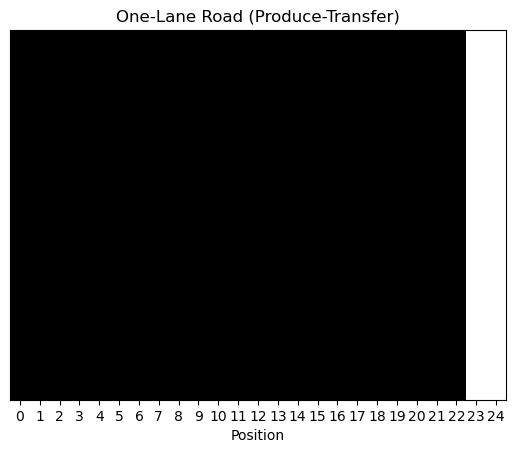

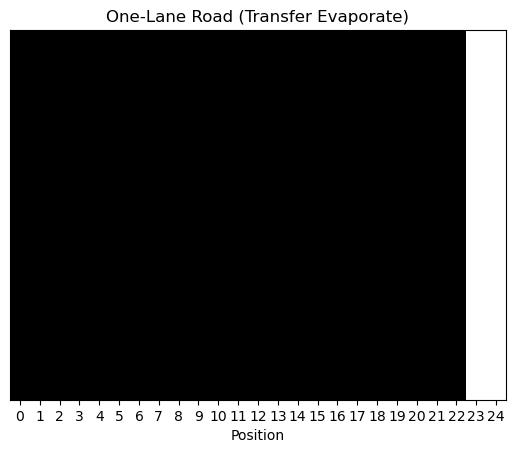

Cars:
ID: 34, Position: 21, Speed: 0
ID: 35, Position: 20, Speed: 0
ID: 36, Position: 19, Speed: 0
ID: 37, Position: 18, Speed: 0
ID: 38, Position: 17, Speed: 0
ID: 39, Position: 16, Speed: 0
ID: 40, Position: 15, Speed: 0
ID: 41, Position: 14, Speed: 0
ID: 42, Position: 13, Speed: 0
ID: 43, Position: 12, Speed: 0
ID: 44, Position: 11, Speed: 0
ID: 45, Position: 10, Speed: 0
ID: 46, Position: 9, Speed: 0
ID: 47, Position: 8, Speed: 0
ID: 48, Position: 7, Speed: 0
ID: 49, Position: 6, Speed: 0
ID: 50, Position: 5, Speed: 0
ID: 51, Position: 4, Speed: 0
ID: 52, Position: 3, Speed: 0
ID: 53, Position: 2, Speed: 0
ID: 54, Position: 1, Speed: 0
ID: 55, Position: 0, Speed: 0
ID: 56, Position: 0, Speed: 0
ID: 57, Position: 0, Speed: 0
ID: 32, Position: 23, Speed: 1
ID: 33, Position: 22, Speed: 1
ID: 34, Position: 21, Speed: 1
ID: 35, Position: 20, Speed: 1
ID: 36, Position: 19, Speed: 1
ID: 37, Position: 18, Speed: 1
ID: 38, Position: 17, Speed: 1
ID: 39, Position: 16, Speed: 1
ID: 40, Positi

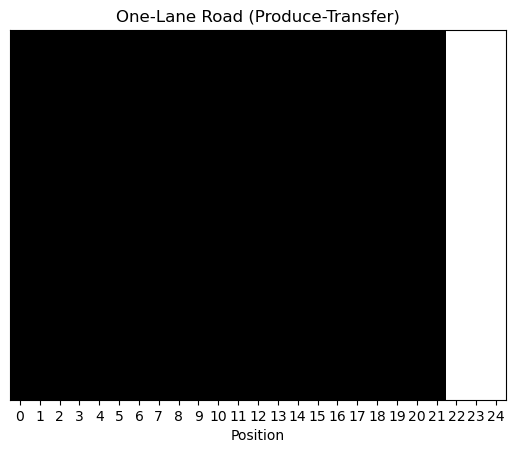

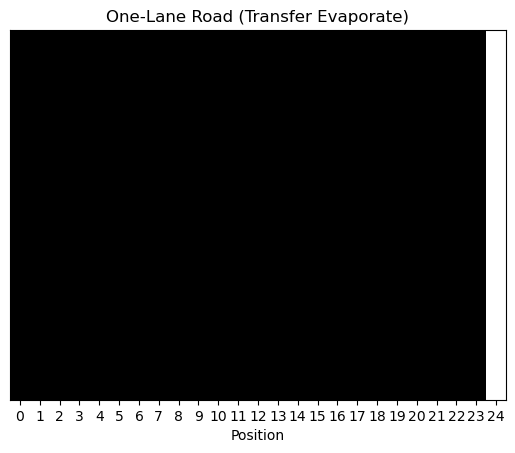

Cars:
ID: 34, Position: 22, Speed: 1
ID: 35, Position: 21, Speed: 1
ID: 36, Position: 20, Speed: 1
ID: 37, Position: 19, Speed: 1
ID: 38, Position: 18, Speed: 1
ID: 39, Position: 17, Speed: 1
ID: 40, Position: 16, Speed: 1
ID: 41, Position: 15, Speed: 1
ID: 42, Position: 14, Speed: 1
ID: 43, Position: 13, Speed: 1
ID: 44, Position: 12, Speed: 1
ID: 45, Position: 11, Speed: 1
ID: 46, Position: 10, Speed: 1
ID: 47, Position: 9, Speed: 1
ID: 48, Position: 8, Speed: 1
ID: 49, Position: 7, Speed: 1
ID: 50, Position: 6, Speed: 1
ID: 51, Position: 5, Speed: 1
ID: 52, Position: 4, Speed: 1
ID: 53, Position: 3, Speed: 1
ID: 54, Position: 2, Speed: 1
ID: 55, Position: 1, Speed: 1
ID: 56, Position: 0, Speed: 0
ID: 57, Position: 0, Speed: 0
ID: 58, Position: 0, Speed: 4
ID: 33, Position: 22, Speed: 0
ID: 34, Position: 21, Speed: 0
ID: 35, Position: 20, Speed: 0
ID: 36, Position: 19, Speed: 0
ID: 37, Position: 18, Speed: 0
ID: 38, Position: 17, Speed: 0
ID: 39, Position: 16, Speed: 0
ID: 40, Positi

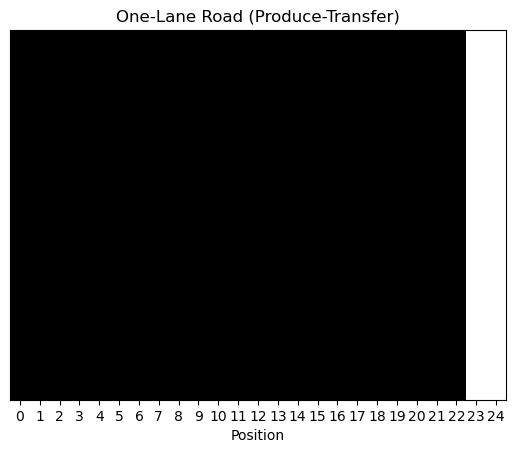

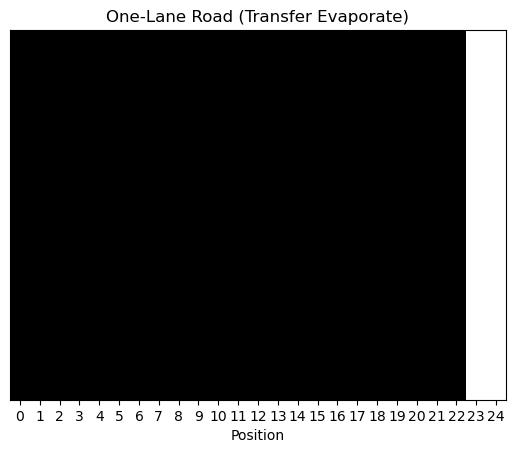

Cars:
ID: 35, Position: 21, Speed: 0
ID: 36, Position: 20, Speed: 0
ID: 37, Position: 19, Speed: 0
ID: 38, Position: 18, Speed: 0
ID: 39, Position: 17, Speed: 0
ID: 40, Position: 16, Speed: 0
ID: 41, Position: 15, Speed: 0
ID: 42, Position: 14, Speed: 0
ID: 43, Position: 13, Speed: 0
ID: 44, Position: 12, Speed: 0
ID: 45, Position: 11, Speed: 0
ID: 46, Position: 10, Speed: 0
ID: 47, Position: 9, Speed: 0
ID: 48, Position: 8, Speed: 0
ID: 49, Position: 7, Speed: 0
ID: 50, Position: 6, Speed: 0
ID: 51, Position: 5, Speed: 0
ID: 52, Position: 4, Speed: 0
ID: 53, Position: 3, Speed: 0
ID: 54, Position: 2, Speed: 0
ID: 55, Position: 1, Speed: 0
ID: 56, Position: 0, Speed: 0
ID: 57, Position: 0, Speed: 0
ID: 58, Position: 0, Speed: 0
ID: 59, Position: 0, Speed: 1
ID: 33, Position: 23, Speed: 1
ID: 34, Position: 22, Speed: 1
ID: 35, Position: 21, Speed: 1
ID: 36, Position: 20, Speed: 1
ID: 37, Position: 19, Speed: 1
ID: 38, Position: 18, Speed: 1
ID: 39, Position: 17, Speed: 1
ID: 40, Positio

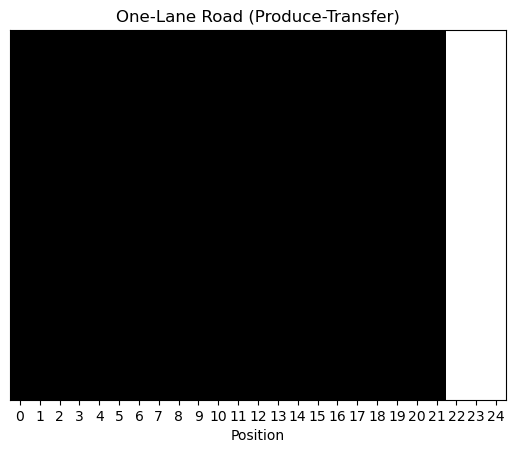

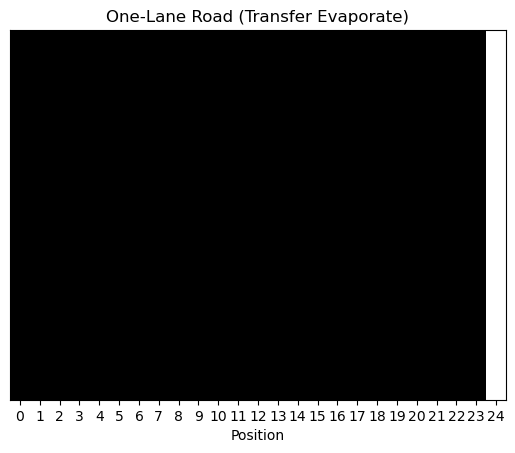

Cars:
ID: 35, Position: 22, Speed: 1
ID: 36, Position: 21, Speed: 1
ID: 37, Position: 20, Speed: 1
ID: 38, Position: 19, Speed: 1
ID: 39, Position: 18, Speed: 1
ID: 40, Position: 17, Speed: 1
ID: 41, Position: 16, Speed: 1
ID: 42, Position: 15, Speed: 1
ID: 43, Position: 14, Speed: 1
ID: 44, Position: 13, Speed: 1
ID: 45, Position: 12, Speed: 1
ID: 46, Position: 11, Speed: 1
ID: 47, Position: 10, Speed: 1
ID: 48, Position: 9, Speed: 1
ID: 49, Position: 8, Speed: 1
ID: 50, Position: 7, Speed: 1
ID: 51, Position: 6, Speed: 1
ID: 52, Position: 5, Speed: 1
ID: 53, Position: 4, Speed: 1
ID: 54, Position: 3, Speed: 1
ID: 55, Position: 2, Speed: 1
ID: 56, Position: 1, Speed: 1
ID: 57, Position: 0, Speed: 0
ID: 58, Position: 0, Speed: 0
ID: 59, Position: 0, Speed: 0
ID: 60, Position: 0, Speed: 3
ID: 34, Position: 22, Speed: 0
ID: 35, Position: 21, Speed: 0
ID: 36, Position: 20, Speed: 0
ID: 37, Position: 19, Speed: 0
ID: 38, Position: 18, Speed: 0
ID: 39, Position: 17, Speed: 0
ID: 40, Positio

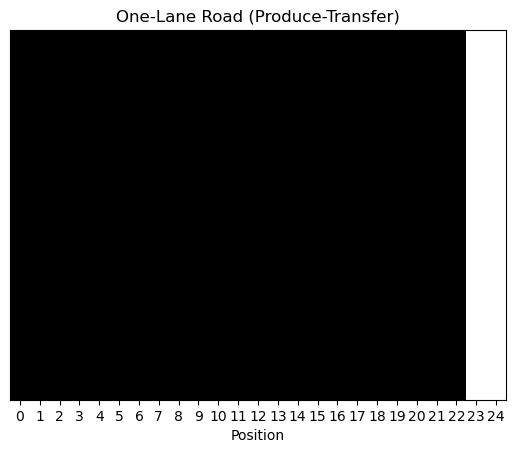

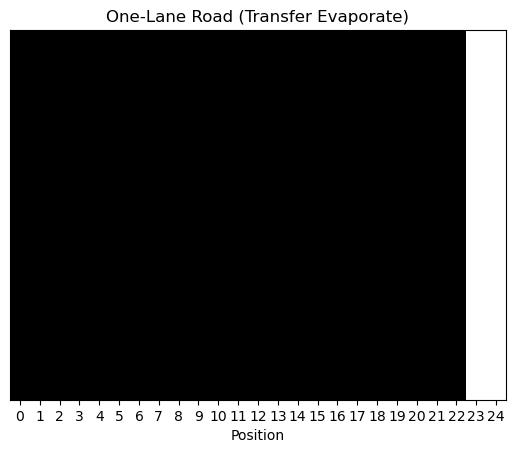

Cars:
ID: 36, Position: 21, Speed: 0
ID: 37, Position: 20, Speed: 0
ID: 38, Position: 19, Speed: 0
ID: 39, Position: 18, Speed: 0
ID: 40, Position: 17, Speed: 0
ID: 41, Position: 16, Speed: 0
ID: 42, Position: 15, Speed: 0
ID: 43, Position: 14, Speed: 0
ID: 44, Position: 13, Speed: 0
ID: 45, Position: 12, Speed: 0
ID: 46, Position: 11, Speed: 0
ID: 47, Position: 10, Speed: 0
ID: 48, Position: 9, Speed: 0
ID: 49, Position: 8, Speed: 0
ID: 50, Position: 7, Speed: 0
ID: 51, Position: 6, Speed: 0
ID: 52, Position: 5, Speed: 0
ID: 53, Position: 4, Speed: 0
ID: 54, Position: 3, Speed: 0
ID: 55, Position: 2, Speed: 0
ID: 56, Position: 1, Speed: 0
ID: 57, Position: 0, Speed: 0
ID: 58, Position: 0, Speed: 0
ID: 59, Position: 0, Speed: 0
ID: 60, Position: 0, Speed: 0
ID: 61, Position: 0, Speed: 4
ID: 34, Position: 23, Speed: 1
ID: 35, Position: 22, Speed: 1
ID: 36, Position: 21, Speed: 1
ID: 37, Position: 20, Speed: 1
ID: 38, Position: 19, Speed: 1
ID: 39, Position: 18, Speed: 1
ID: 40, Position

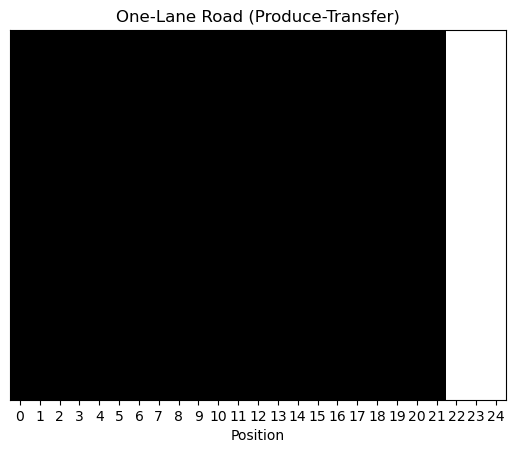

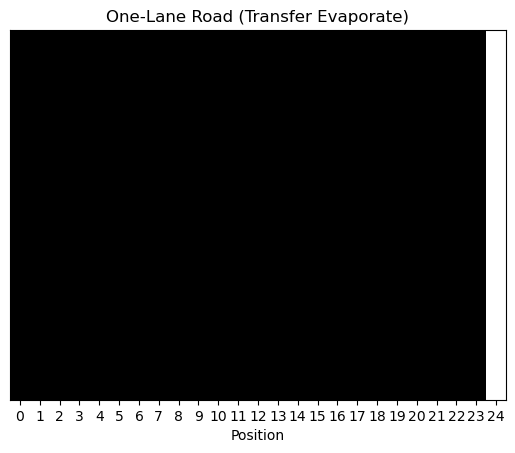

Cars:
ID: 36, Position: 22, Speed: 1
ID: 37, Position: 21, Speed: 1
ID: 38, Position: 20, Speed: 1
ID: 39, Position: 19, Speed: 1
ID: 40, Position: 18, Speed: 1
ID: 41, Position: 17, Speed: 1
ID: 42, Position: 16, Speed: 1
ID: 43, Position: 15, Speed: 1
ID: 44, Position: 14, Speed: 1
ID: 45, Position: 13, Speed: 1
ID: 46, Position: 12, Speed: 1
ID: 47, Position: 11, Speed: 1
ID: 48, Position: 10, Speed: 1
ID: 49, Position: 9, Speed: 1
ID: 50, Position: 8, Speed: 1
ID: 51, Position: 7, Speed: 1
ID: 52, Position: 6, Speed: 1
ID: 53, Position: 5, Speed: 1
ID: 54, Position: 4, Speed: 1
ID: 55, Position: 3, Speed: 1
ID: 56, Position: 2, Speed: 1
ID: 57, Position: 1, Speed: 1
ID: 58, Position: 0, Speed: 0
ID: 59, Position: 0, Speed: 0
ID: 60, Position: 0, Speed: 0
ID: 61, Position: 0, Speed: 0
ID: 62, Position: 0, Speed: 2
ID: 35, Position: 22, Speed: 0
ID: 36, Position: 21, Speed: 0
ID: 37, Position: 20, Speed: 0
ID: 38, Position: 19, Speed: 0
ID: 39, Position: 18, Speed: 0
ID: 40, Position

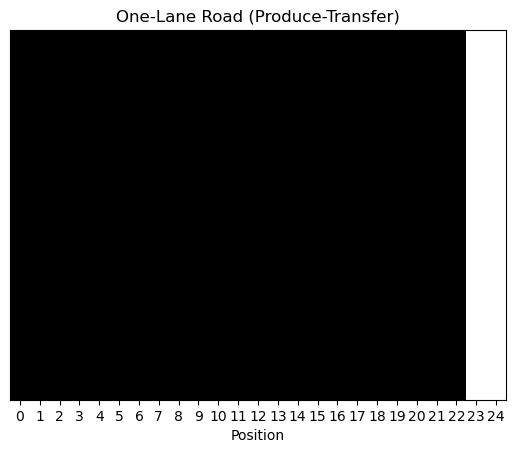

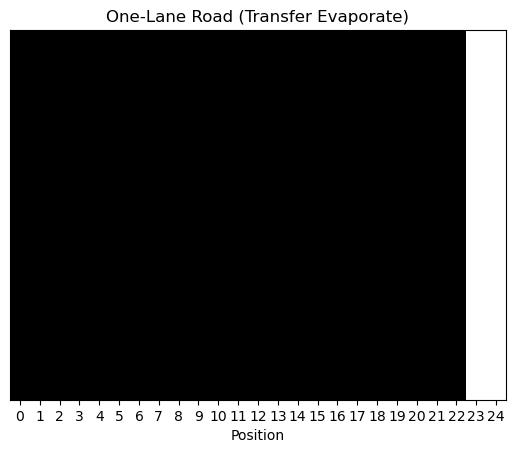

Cars:
ID: 37, Position: 21, Speed: 0
ID: 38, Position: 20, Speed: 0
ID: 39, Position: 19, Speed: 0
ID: 40, Position: 18, Speed: 0
ID: 41, Position: 17, Speed: 0
ID: 42, Position: 16, Speed: 0
ID: 43, Position: 15, Speed: 0
ID: 44, Position: 14, Speed: 0
ID: 45, Position: 13, Speed: 0
ID: 46, Position: 12, Speed: 0
ID: 47, Position: 11, Speed: 0
ID: 48, Position: 10, Speed: 0
ID: 49, Position: 9, Speed: 0
ID: 50, Position: 8, Speed: 0
ID: 51, Position: 7, Speed: 0
ID: 52, Position: 6, Speed: 0
ID: 53, Position: 5, Speed: 0
ID: 54, Position: 4, Speed: 0
ID: 55, Position: 3, Speed: 0
ID: 56, Position: 2, Speed: 0
ID: 57, Position: 1, Speed: 0
ID: 58, Position: 0, Speed: 0
ID: 59, Position: 0, Speed: 0
ID: 60, Position: 0, Speed: 0
ID: 61, Position: 0, Speed: 0
ID: 62, Position: 0, Speed: 0
ID: 35, Position: 23, Speed: 1
ID: 36, Position: 22, Speed: 1
ID: 37, Position: 21, Speed: 1
ID: 38, Position: 20, Speed: 1
ID: 39, Position: 19, Speed: 1
ID: 40, Position: 18, Speed: 1
ID: 41, Position

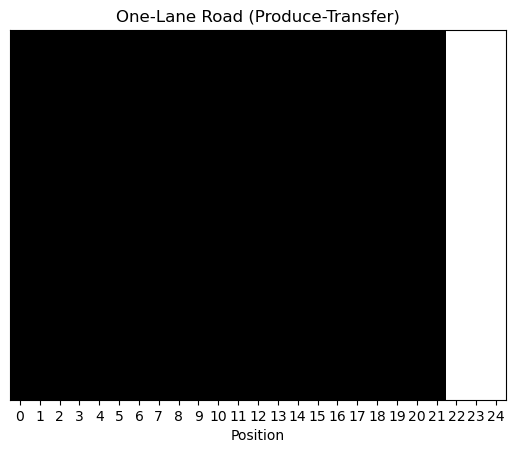

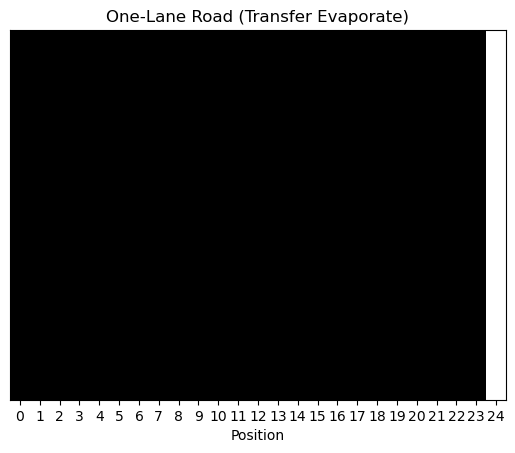

Cars:
ID: 37, Position: 22, Speed: 1
ID: 38, Position: 21, Speed: 1
ID: 39, Position: 20, Speed: 1
ID: 40, Position: 19, Speed: 1
ID: 41, Position: 18, Speed: 1
ID: 42, Position: 17, Speed: 1
ID: 43, Position: 16, Speed: 1
ID: 44, Position: 15, Speed: 1
ID: 45, Position: 14, Speed: 1
ID: 46, Position: 13, Speed: 1
ID: 47, Position: 12, Speed: 1
ID: 48, Position: 11, Speed: 1
ID: 49, Position: 10, Speed: 1
ID: 50, Position: 9, Speed: 1
ID: 51, Position: 8, Speed: 1
ID: 52, Position: 7, Speed: 1
ID: 53, Position: 6, Speed: 1
ID: 54, Position: 5, Speed: 1
ID: 55, Position: 4, Speed: 1
ID: 56, Position: 3, Speed: 1
ID: 57, Position: 2, Speed: 1
ID: 58, Position: 1, Speed: 1
ID: 59, Position: 0, Speed: 0
ID: 60, Position: 0, Speed: 0
ID: 61, Position: 0, Speed: 0
ID: 62, Position: 0, Speed: 0
ID: 63, Position: 0, Speed: 1
ID: 36, Position: 22, Speed: 0
ID: 37, Position: 21, Speed: 0
ID: 38, Position: 20, Speed: 0
ID: 39, Position: 19, Speed: 0
ID: 40, Position: 18, Speed: 0
ID: 41, Position

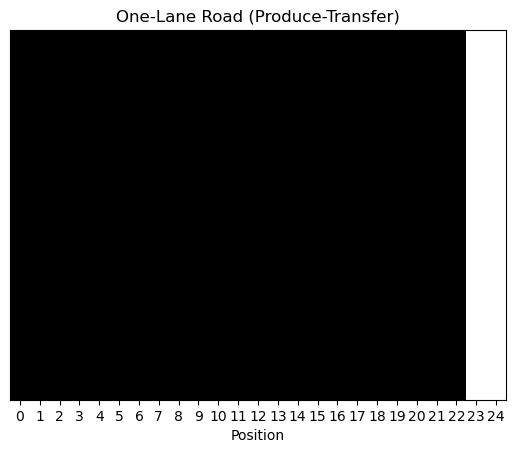

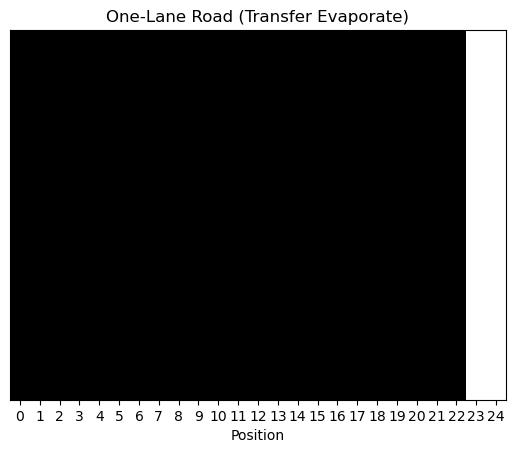

Cars:
ID: 38, Position: 21, Speed: 0
ID: 39, Position: 20, Speed: 0
ID: 40, Position: 19, Speed: 0
ID: 41, Position: 18, Speed: 0
ID: 42, Position: 17, Speed: 0
ID: 43, Position: 16, Speed: 0
ID: 44, Position: 15, Speed: 0
ID: 45, Position: 14, Speed: 0
ID: 46, Position: 13, Speed: 0
ID: 47, Position: 12, Speed: 0
ID: 48, Position: 11, Speed: 0
ID: 49, Position: 10, Speed: 0
ID: 50, Position: 9, Speed: 0
ID: 51, Position: 8, Speed: 0
ID: 52, Position: 7, Speed: 0
ID: 53, Position: 6, Speed: 0
ID: 54, Position: 5, Speed: 0
ID: 55, Position: 4, Speed: 0
ID: 56, Position: 3, Speed: 0
ID: 57, Position: 2, Speed: 0
ID: 58, Position: 1, Speed: 0
ID: 59, Position: 0, Speed: 0
ID: 60, Position: 0, Speed: 0
ID: 61, Position: 0, Speed: 0
ID: 62, Position: 0, Speed: 0
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 1
ID: 36, Position: 23, Speed: 1
ID: 37, Position: 22, Speed: 1
ID: 38, Position: 21, Speed: 1
ID: 39, Position: 20, Speed: 1
ID: 40, Position: 19, Speed: 1
ID: 41, Position:

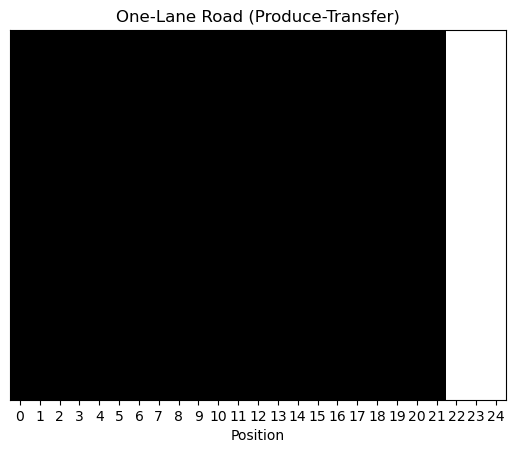

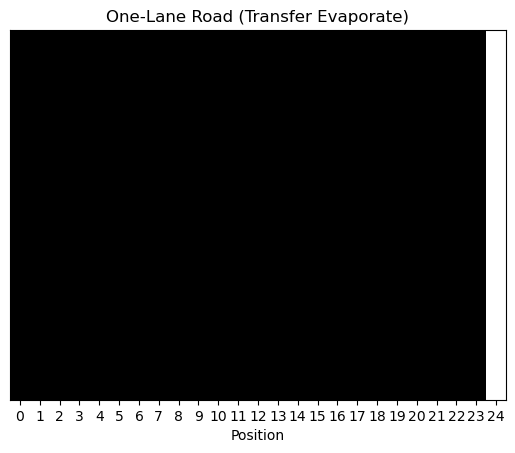

Cars:
ID: 38, Position: 22, Speed: 1
ID: 39, Position: 21, Speed: 1
ID: 40, Position: 20, Speed: 1
ID: 41, Position: 19, Speed: 1
ID: 42, Position: 18, Speed: 1
ID: 43, Position: 17, Speed: 1
ID: 44, Position: 16, Speed: 1
ID: 45, Position: 15, Speed: 1
ID: 46, Position: 14, Speed: 1
ID: 47, Position: 13, Speed: 1
ID: 48, Position: 12, Speed: 1
ID: 49, Position: 11, Speed: 1
ID: 50, Position: 10, Speed: 1
ID: 51, Position: 9, Speed: 1
ID: 52, Position: 8, Speed: 1
ID: 53, Position: 7, Speed: 1
ID: 54, Position: 6, Speed: 1
ID: 55, Position: 5, Speed: 1
ID: 56, Position: 4, Speed: 1
ID: 57, Position: 3, Speed: 1
ID: 58, Position: 2, Speed: 1
ID: 59, Position: 1, Speed: 1
ID: 60, Position: 0, Speed: 0
ID: 61, Position: 0, Speed: 0
ID: 62, Position: 0, Speed: 0
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 3
ID: 37, Position: 22, Speed: 0
ID: 38, Position: 21, Speed: 0
ID: 39, Position: 20, Speed: 0
ID: 40, Position: 19, Speed: 0
ID: 41, Position:

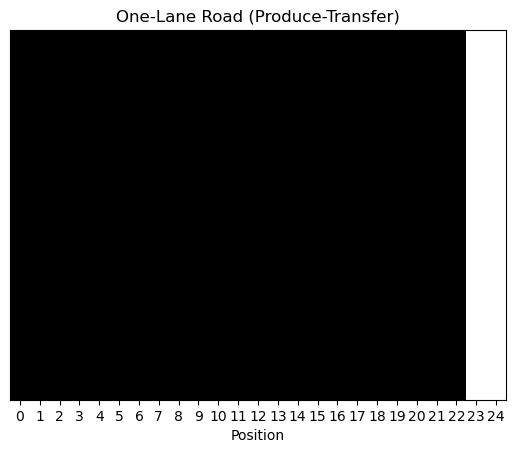

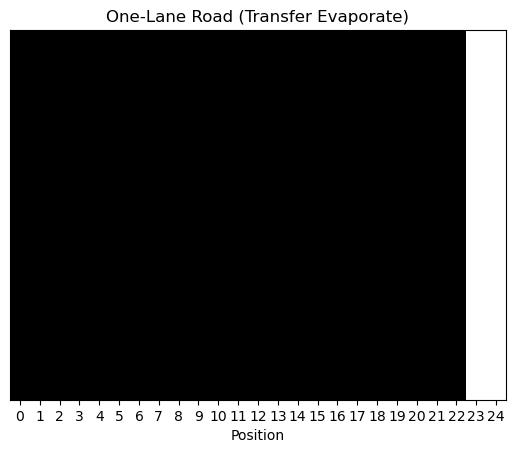

Cars:
ID: 39, Position: 21, Speed: 0
ID: 40, Position: 20, Speed: 0
ID: 41, Position: 19, Speed: 0
ID: 42, Position: 18, Speed: 0
ID: 43, Position: 17, Speed: 0
ID: 44, Position: 16, Speed: 0
ID: 45, Position: 15, Speed: 0
ID: 46, Position: 14, Speed: 0
ID: 47, Position: 13, Speed: 0
ID: 48, Position: 12, Speed: 0
ID: 49, Position: 11, Speed: 0
ID: 50, Position: 10, Speed: 0
ID: 51, Position: 9, Speed: 0
ID: 52, Position: 8, Speed: 0
ID: 53, Position: 7, Speed: 0
ID: 54, Position: 6, Speed: 0
ID: 55, Position: 5, Speed: 0
ID: 56, Position: 4, Speed: 0
ID: 57, Position: 3, Speed: 0
ID: 58, Position: 2, Speed: 0
ID: 59, Position: 1, Speed: 0
ID: 60, Position: 0, Speed: 0
ID: 61, Position: 0, Speed: 0
ID: 62, Position: 0, Speed: 0
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 3
ID: 37, Position: 23, Speed: 1
ID: 38, Position: 22, Speed: 1
ID: 39, Position: 21, Speed: 1
ID: 40, Position: 20, Speed: 1
ID: 41, Position: 

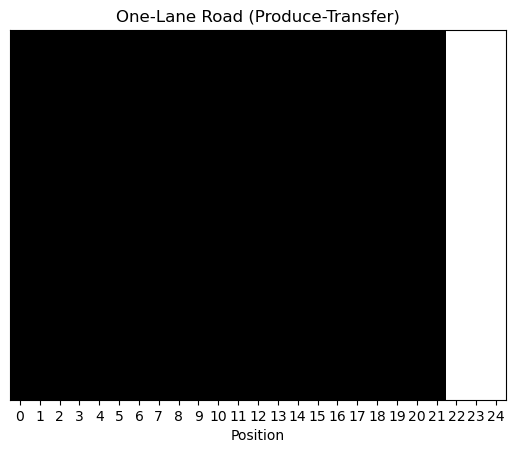

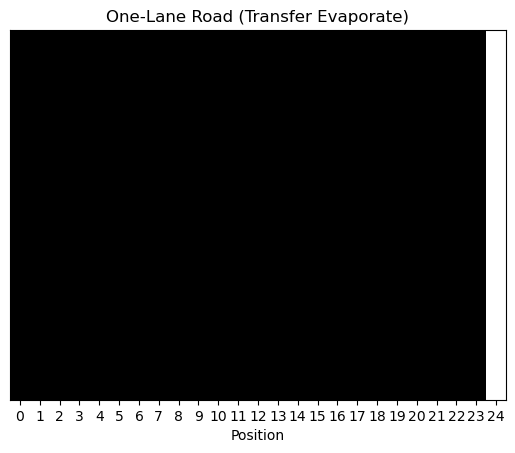

Cars:
ID: 39, Position: 22, Speed: 1
ID: 40, Position: 21, Speed: 1
ID: 41, Position: 20, Speed: 1
ID: 42, Position: 19, Speed: 1
ID: 43, Position: 18, Speed: 1
ID: 44, Position: 17, Speed: 1
ID: 45, Position: 16, Speed: 1
ID: 46, Position: 15, Speed: 1
ID: 47, Position: 14, Speed: 1
ID: 48, Position: 13, Speed: 1
ID: 49, Position: 12, Speed: 1
ID: 50, Position: 11, Speed: 1
ID: 51, Position: 10, Speed: 1
ID: 52, Position: 9, Speed: 1
ID: 53, Position: 8, Speed: 1
ID: 54, Position: 7, Speed: 1
ID: 55, Position: 6, Speed: 1
ID: 56, Position: 5, Speed: 1
ID: 57, Position: 4, Speed: 1
ID: 58, Position: 3, Speed: 1
ID: 59, Position: 2, Speed: 1
ID: 60, Position: 1, Speed: 1
ID: 61, Position: 0, Speed: 0
ID: 62, Position: 0, Speed: 0
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 3
ID: 38, Position: 22, Speed: 0
ID: 39, Position: 21, Speed: 0
ID: 40, Position: 20, Speed: 0
ID: 41, Position: 

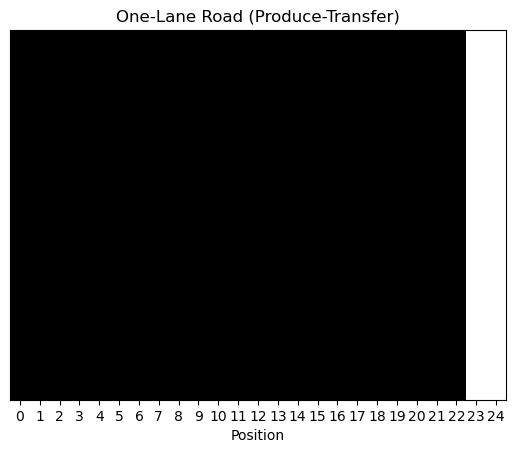

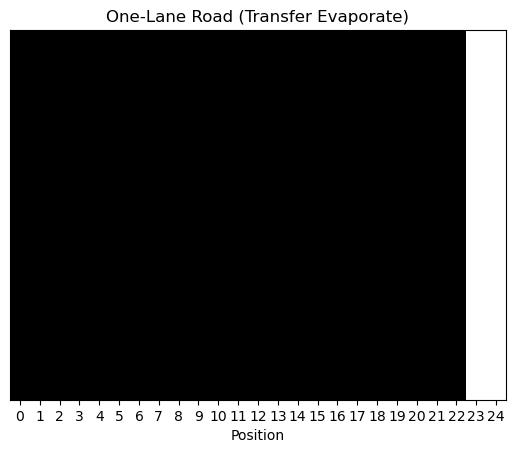

Cars:
ID: 40, Position: 21, Speed: 0
ID: 41, Position: 20, Speed: 0
ID: 42, Position: 19, Speed: 0
ID: 43, Position: 18, Speed: 0
ID: 44, Position: 17, Speed: 0
ID: 45, Position: 16, Speed: 0
ID: 46, Position: 15, Speed: 0
ID: 47, Position: 14, Speed: 0
ID: 48, Position: 13, Speed: 0
ID: 49, Position: 12, Speed: 0
ID: 50, Position: 11, Speed: 0
ID: 51, Position: 10, Speed: 0
ID: 52, Position: 9, Speed: 0
ID: 53, Position: 8, Speed: 0
ID: 54, Position: 7, Speed: 0
ID: 55, Position: 6, Speed: 0
ID: 56, Position: 5, Speed: 0
ID: 57, Position: 4, Speed: 0
ID: 58, Position: 3, Speed: 0
ID: 59, Position: 2, Speed: 0
ID: 60, Position: 1, Speed: 0
ID: 61, Position: 0, Speed: 0
ID: 62, Position: 0, Speed: 0
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 4
ID: 38, Position: 23, Speed: 1
ID: 39, Position: 22, Speed: 1
ID: 40, Position: 21, Speed: 1
ID: 41, Position: 2

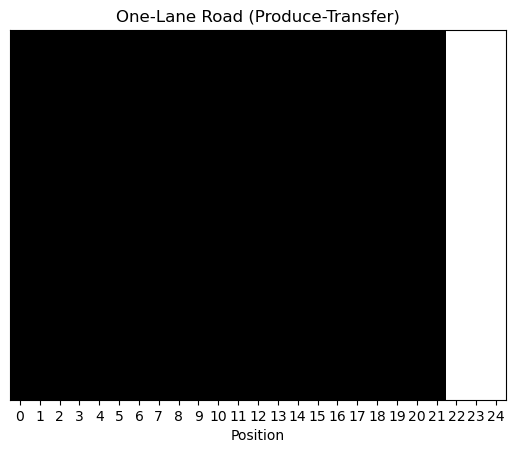

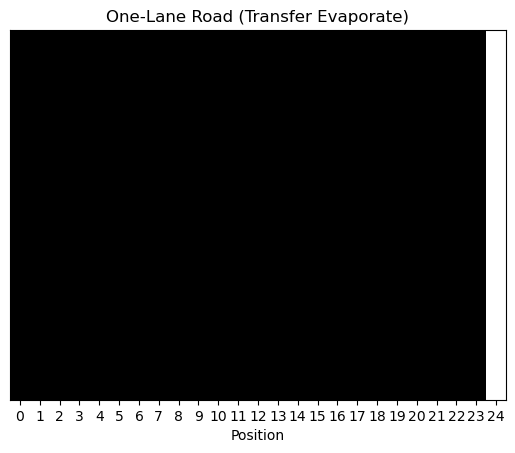

Cars:
ID: 40, Position: 22, Speed: 1
ID: 41, Position: 21, Speed: 1
ID: 42, Position: 20, Speed: 1
ID: 43, Position: 19, Speed: 1
ID: 44, Position: 18, Speed: 1
ID: 45, Position: 17, Speed: 1
ID: 46, Position: 16, Speed: 1
ID: 47, Position: 15, Speed: 1
ID: 48, Position: 14, Speed: 1
ID: 49, Position: 13, Speed: 1
ID: 50, Position: 12, Speed: 1
ID: 51, Position: 11, Speed: 1
ID: 52, Position: 10, Speed: 1
ID: 53, Position: 9, Speed: 1
ID: 54, Position: 8, Speed: 1
ID: 55, Position: 7, Speed: 1
ID: 56, Position: 6, Speed: 1
ID: 57, Position: 5, Speed: 1
ID: 58, Position: 4, Speed: 1
ID: 59, Position: 3, Speed: 1
ID: 60, Position: 2, Speed: 1
ID: 61, Position: 1, Speed: 1
ID: 62, Position: 0, Speed: 0
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 1
ID: 39, Position: 22, Speed: 0
ID: 40, Position: 21, Speed: 0
ID: 41, Position: 2

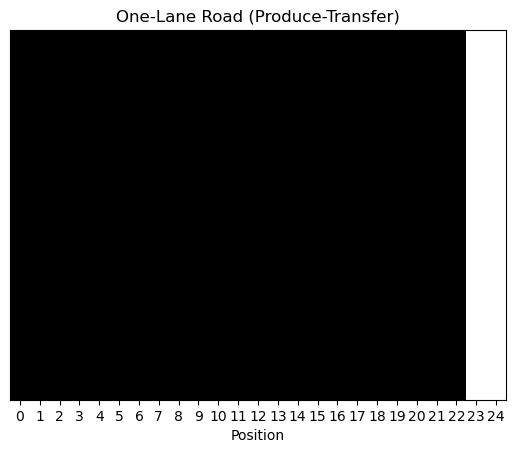

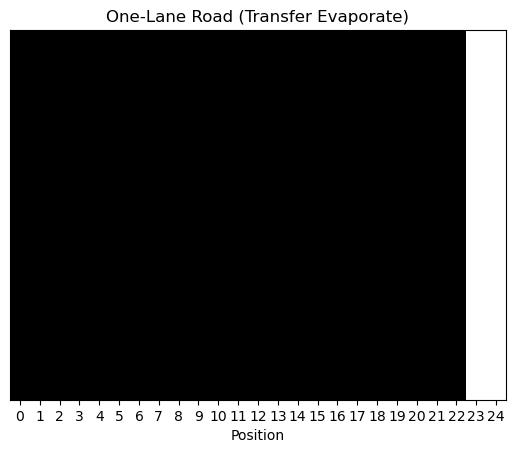

Cars:
ID: 41, Position: 21, Speed: 0
ID: 42, Position: 20, Speed: 0
ID: 43, Position: 19, Speed: 0
ID: 44, Position: 18, Speed: 0
ID: 45, Position: 17, Speed: 0
ID: 46, Position: 16, Speed: 0
ID: 47, Position: 15, Speed: 0
ID: 48, Position: 14, Speed: 0
ID: 49, Position: 13, Speed: 0
ID: 50, Position: 12, Speed: 0
ID: 51, Position: 11, Speed: 0
ID: 52, Position: 10, Speed: 0
ID: 53, Position: 9, Speed: 0
ID: 54, Position: 8, Speed: 0
ID: 55, Position: 7, Speed: 0
ID: 56, Position: 6, Speed: 0
ID: 57, Position: 5, Speed: 0
ID: 58, Position: 4, Speed: 0
ID: 59, Position: 3, Speed: 0
ID: 60, Position: 2, Speed: 0
ID: 61, Position: 1, Speed: 0
ID: 62, Position: 0, Speed: 0
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 39, Position: 23, Speed: 1
ID: 40, Position: 22, Speed: 1
ID: 41, Position: 21, Speed: 1
ID: 42, Position: 2

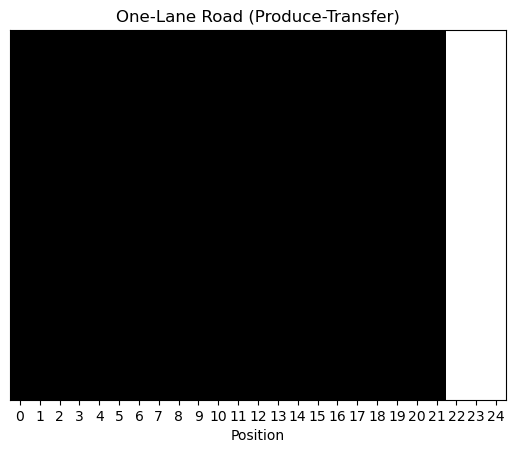

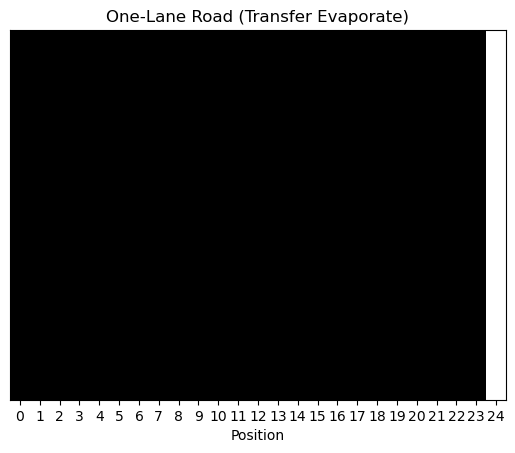

Cars:
ID: 41, Position: 22, Speed: 1
ID: 42, Position: 21, Speed: 1
ID: 43, Position: 20, Speed: 1
ID: 44, Position: 19, Speed: 1
ID: 45, Position: 18, Speed: 1
ID: 46, Position: 17, Speed: 1
ID: 47, Position: 16, Speed: 1
ID: 48, Position: 15, Speed: 1
ID: 49, Position: 14, Speed: 1
ID: 50, Position: 13, Speed: 1
ID: 51, Position: 12, Speed: 1
ID: 52, Position: 11, Speed: 1
ID: 53, Position: 10, Speed: 1
ID: 54, Position: 9, Speed: 1
ID: 55, Position: 8, Speed: 1
ID: 56, Position: 7, Speed: 1
ID: 57, Position: 6, Speed: 1
ID: 58, Position: 5, Speed: 1
ID: 59, Position: 4, Speed: 1
ID: 60, Position: 3, Speed: 1
ID: 61, Position: 2, Speed: 1
ID: 62, Position: 1, Speed: 1
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 4
ID: 40, Position: 22, Speed: 0
ID: 41, Position: 21, Speed: 0
ID: 42, Position: 2

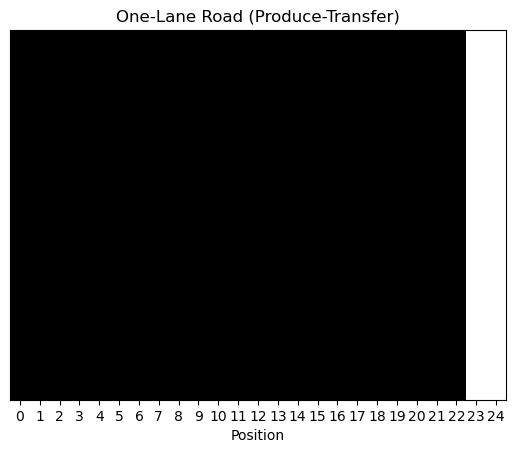

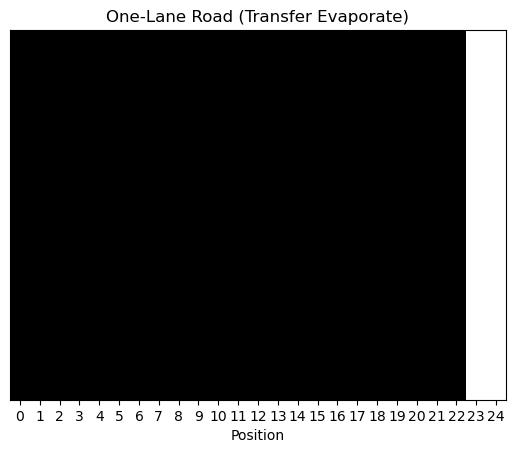

Cars:
ID: 42, Position: 21, Speed: 0
ID: 43, Position: 20, Speed: 0
ID: 44, Position: 19, Speed: 0
ID: 45, Position: 18, Speed: 0
ID: 46, Position: 17, Speed: 0
ID: 47, Position: 16, Speed: 0
ID: 48, Position: 15, Speed: 0
ID: 49, Position: 14, Speed: 0
ID: 50, Position: 13, Speed: 0
ID: 51, Position: 12, Speed: 0
ID: 52, Position: 11, Speed: 0
ID: 53, Position: 10, Speed: 0
ID: 54, Position: 9, Speed: 0
ID: 55, Position: 8, Speed: 0
ID: 56, Position: 7, Speed: 0
ID: 57, Position: 6, Speed: 0
ID: 58, Position: 5, Speed: 0
ID: 59, Position: 4, Speed: 0
ID: 60, Position: 3, Speed: 0
ID: 61, Position: 2, Speed: 0
ID: 62, Position: 1, Speed: 0
ID: 63, Position: 0, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 5
ID: 40, Position: 23, Speed: 1
ID: 41, Position: 22, Speed: 1
ID: 42, Position: 21

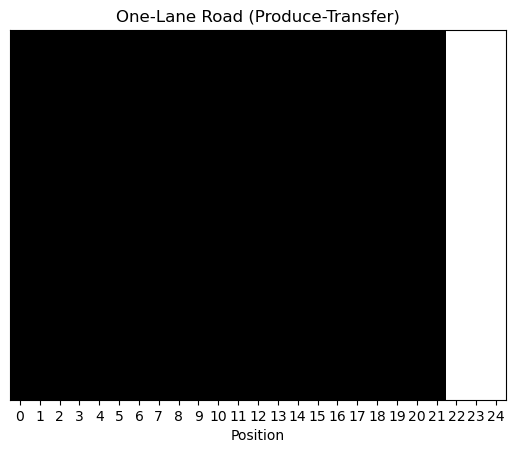

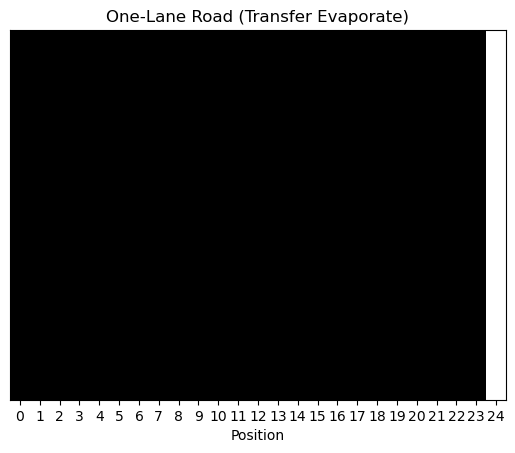

Cars:
ID: 42, Position: 22, Speed: 1
ID: 43, Position: 21, Speed: 1
ID: 44, Position: 20, Speed: 1
ID: 45, Position: 19, Speed: 1
ID: 46, Position: 18, Speed: 1
ID: 47, Position: 17, Speed: 1
ID: 48, Position: 16, Speed: 1
ID: 49, Position: 15, Speed: 1
ID: 50, Position: 14, Speed: 1
ID: 51, Position: 13, Speed: 1
ID: 52, Position: 12, Speed: 1
ID: 53, Position: 11, Speed: 1
ID: 54, Position: 10, Speed: 1
ID: 55, Position: 9, Speed: 1
ID: 56, Position: 8, Speed: 1
ID: 57, Position: 7, Speed: 1
ID: 58, Position: 6, Speed: 1
ID: 59, Position: 5, Speed: 1
ID: 60, Position: 4, Speed: 1
ID: 61, Position: 3, Speed: 1
ID: 62, Position: 2, Speed: 1
ID: 63, Position: 1, Speed: 1
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 41, Position: 22, Speed: 0
ID: 42, Position: 21, Speed: 0
ID: 43, Position: 2

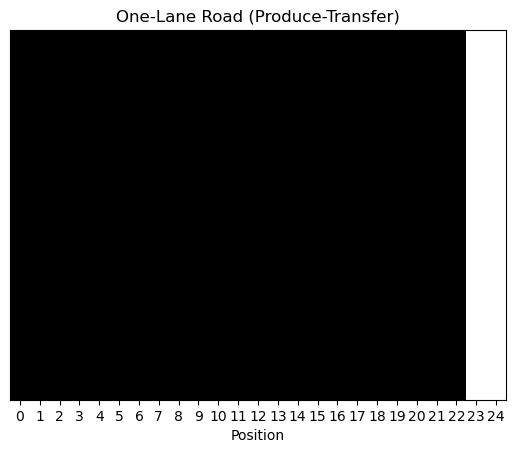

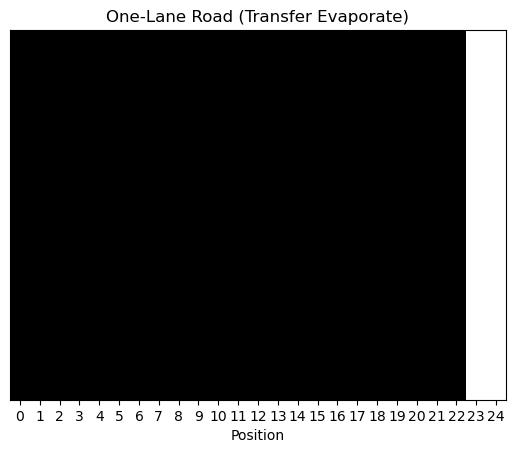

Cars:
ID: 43, Position: 21, Speed: 0
ID: 44, Position: 20, Speed: 0
ID: 45, Position: 19, Speed: 0
ID: 46, Position: 18, Speed: 0
ID: 47, Position: 17, Speed: 0
ID: 48, Position: 16, Speed: 0
ID: 49, Position: 15, Speed: 0
ID: 50, Position: 14, Speed: 0
ID: 51, Position: 13, Speed: 0
ID: 52, Position: 12, Speed: 0
ID: 53, Position: 11, Speed: 0
ID: 54, Position: 10, Speed: 0
ID: 55, Position: 9, Speed: 0
ID: 56, Position: 8, Speed: 0
ID: 57, Position: 7, Speed: 0
ID: 58, Position: 6, Speed: 0
ID: 59, Position: 5, Speed: 0
ID: 60, Position: 4, Speed: 0
ID: 61, Position: 3, Speed: 0
ID: 62, Position: 2, Speed: 0
ID: 63, Position: 1, Speed: 0
ID: 64, Position: 0, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 41, Position: 23, Speed: 1
ID: 42, Position: 22, Speed: 1
ID: 43, Position: 21, Speed: 1
ID: 44, Position: 2

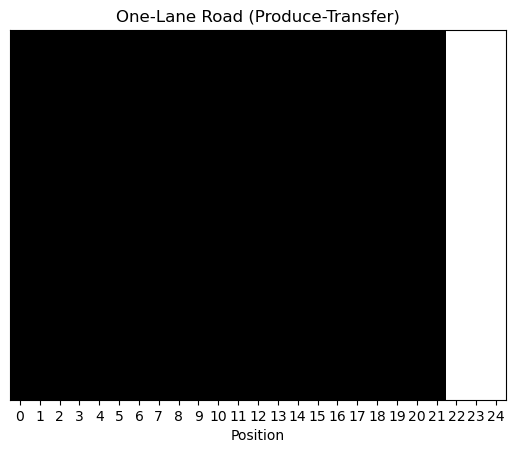

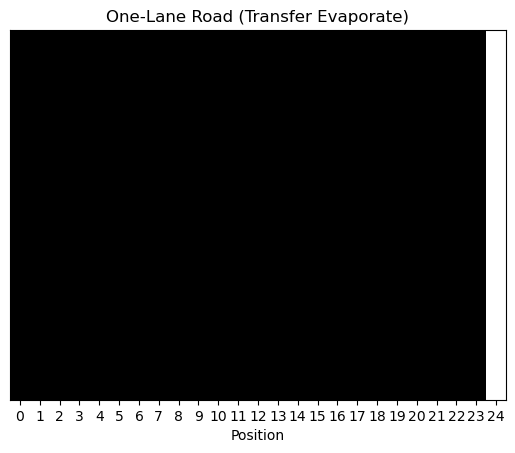

Cars:
ID: 43, Position: 22, Speed: 1
ID: 44, Position: 21, Speed: 1
ID: 45, Position: 20, Speed: 1
ID: 46, Position: 19, Speed: 1
ID: 47, Position: 18, Speed: 1
ID: 48, Position: 17, Speed: 1
ID: 49, Position: 16, Speed: 1
ID: 50, Position: 15, Speed: 1
ID: 51, Position: 14, Speed: 1
ID: 52, Position: 13, Speed: 1
ID: 53, Position: 12, Speed: 1
ID: 54, Position: 11, Speed: 1
ID: 55, Position: 10, Speed: 1
ID: 56, Position: 9, Speed: 1
ID: 57, Position: 8, Speed: 1
ID: 58, Position: 7, Speed: 1
ID: 59, Position: 6, Speed: 1
ID: 60, Position: 5, Speed: 1
ID: 61, Position: 4, Speed: 1
ID: 62, Position: 3, Speed: 1
ID: 63, Position: 2, Speed: 1
ID: 64, Position: 1, Speed: 1
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 42, Position: 22, Speed: 0
ID: 43, Position: 21, Speed: 0
ID: 44, Position: 20, Speed: 0
ID: 45, Position: 

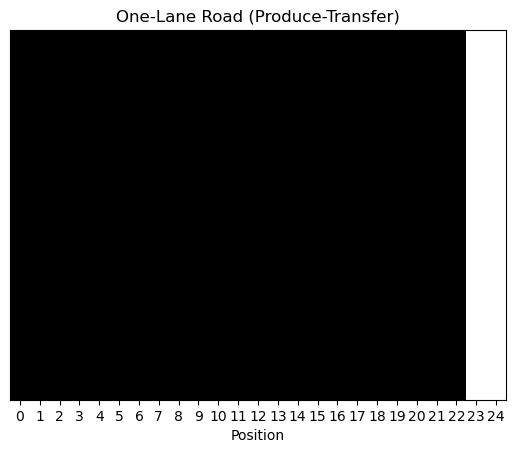

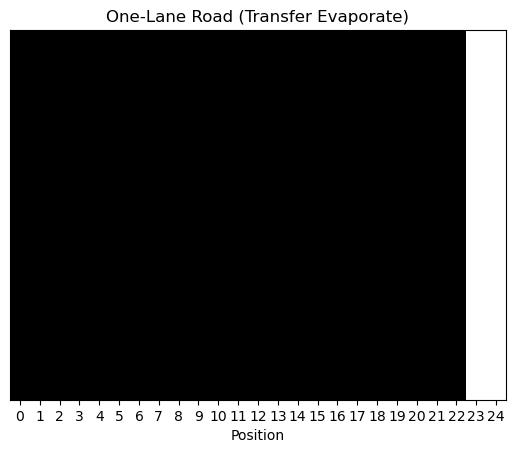

Cars:
ID: 44, Position: 21, Speed: 0
ID: 45, Position: 20, Speed: 0
ID: 46, Position: 19, Speed: 0
ID: 47, Position: 18, Speed: 0
ID: 48, Position: 17, Speed: 0
ID: 49, Position: 16, Speed: 0
ID: 50, Position: 15, Speed: 0
ID: 51, Position: 14, Speed: 0
ID: 52, Position: 13, Speed: 0
ID: 53, Position: 12, Speed: 0
ID: 54, Position: 11, Speed: 0
ID: 55, Position: 10, Speed: 0
ID: 56, Position: 9, Speed: 0
ID: 57, Position: 8, Speed: 0
ID: 58, Position: 7, Speed: 0
ID: 59, Position: 6, Speed: 0
ID: 60, Position: 5, Speed: 0
ID: 61, Position: 4, Speed: 0
ID: 62, Position: 3, Speed: 0
ID: 63, Position: 2, Speed: 0
ID: 64, Position: 1, Speed: 0
ID: 65, Position: 0, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 42, Position: 23, Speed: 1
ID: 43, Position: 22, Speed: 1
ID: 44, Position: 21, Speed: 1
ID: 45, Position: 20, Speed: 1
ID: 46, Position: 

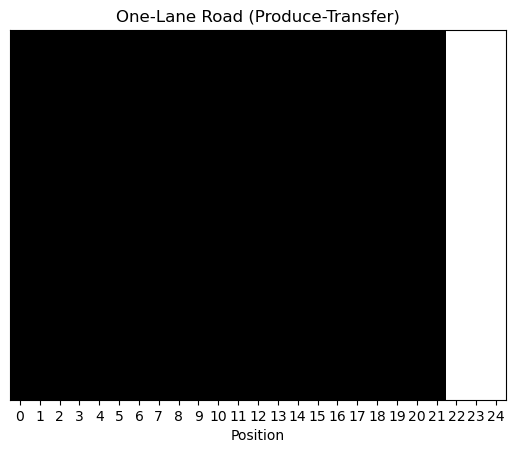

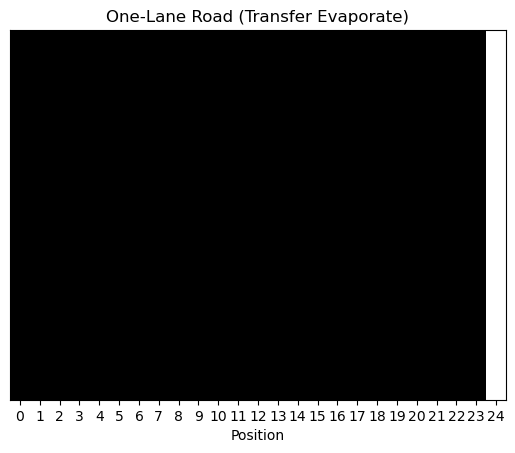

Cars:
ID: 44, Position: 22, Speed: 1
ID: 45, Position: 21, Speed: 1
ID: 46, Position: 20, Speed: 1
ID: 47, Position: 19, Speed: 1
ID: 48, Position: 18, Speed: 1
ID: 49, Position: 17, Speed: 1
ID: 50, Position: 16, Speed: 1
ID: 51, Position: 15, Speed: 1
ID: 52, Position: 14, Speed: 1
ID: 53, Position: 13, Speed: 1
ID: 54, Position: 12, Speed: 1
ID: 55, Position: 11, Speed: 1
ID: 56, Position: 10, Speed: 1
ID: 57, Position: 9, Speed: 1
ID: 58, Position: 8, Speed: 1
ID: 59, Position: 7, Speed: 1
ID: 60, Position: 6, Speed: 1
ID: 61, Position: 5, Speed: 1
ID: 62, Position: 4, Speed: 1
ID: 63, Position: 3, Speed: 1
ID: 64, Position: 2, Speed: 1
ID: 65, Position: 1, Speed: 1
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 4
ID: 43, Position: 22, Speed: 0
ID: 44, Position: 21, Speed: 0
ID: 45, Position: 20, Speed: 0
ID: 46, Position: 

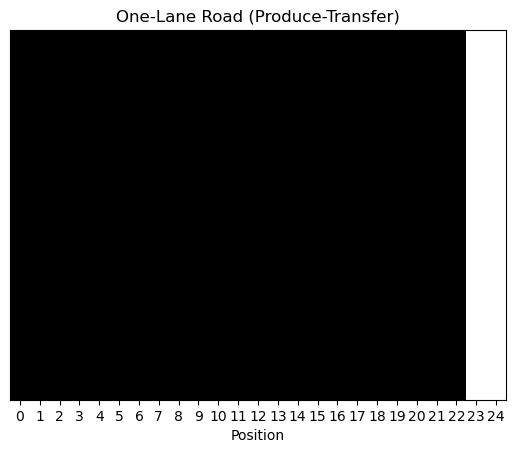

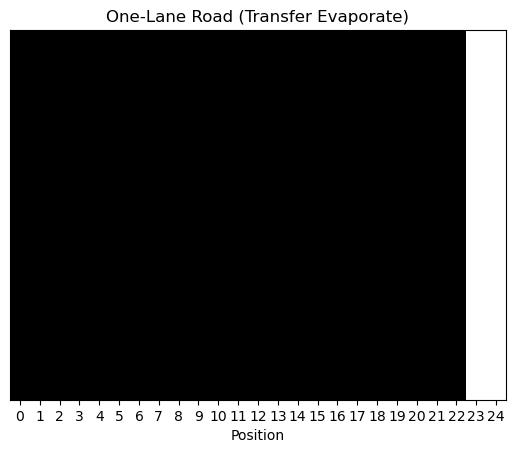

Cars:
ID: 45, Position: 21, Speed: 0
ID: 46, Position: 20, Speed: 0
ID: 47, Position: 19, Speed: 0
ID: 48, Position: 18, Speed: 0
ID: 49, Position: 17, Speed: 0
ID: 50, Position: 16, Speed: 0
ID: 51, Position: 15, Speed: 0
ID: 52, Position: 14, Speed: 0
ID: 53, Position: 13, Speed: 0
ID: 54, Position: 12, Speed: 0
ID: 55, Position: 11, Speed: 0
ID: 56, Position: 10, Speed: 0
ID: 57, Position: 9, Speed: 0
ID: 58, Position: 8, Speed: 0
ID: 59, Position: 7, Speed: 0
ID: 60, Position: 6, Speed: 0
ID: 61, Position: 5, Speed: 0
ID: 62, Position: 4, Speed: 0
ID: 63, Position: 3, Speed: 0
ID: 64, Position: 2, Speed: 0
ID: 65, Position: 1, Speed: 0
ID: 66, Position: 0, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 5
ID: 43, Position: 23, Speed: 1
ID: 44, Position: 22, Speed: 1
ID: 45, Position: 21, Speed: 1
ID: 46, Position: 2

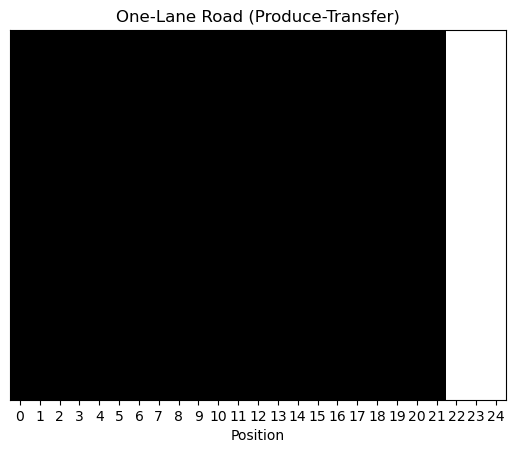

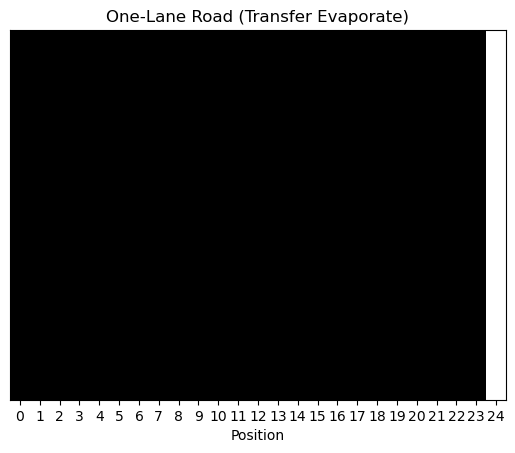

Cars:
ID: 45, Position: 22, Speed: 1
ID: 46, Position: 21, Speed: 1
ID: 47, Position: 20, Speed: 1
ID: 48, Position: 19, Speed: 1
ID: 49, Position: 18, Speed: 1
ID: 50, Position: 17, Speed: 1
ID: 51, Position: 16, Speed: 1
ID: 52, Position: 15, Speed: 1
ID: 53, Position: 14, Speed: 1
ID: 54, Position: 13, Speed: 1
ID: 55, Position: 12, Speed: 1
ID: 56, Position: 11, Speed: 1
ID: 57, Position: 10, Speed: 1
ID: 58, Position: 9, Speed: 1
ID: 59, Position: 8, Speed: 1
ID: 60, Position: 7, Speed: 1
ID: 61, Position: 6, Speed: 1
ID: 62, Position: 5, Speed: 1
ID: 63, Position: 4, Speed: 1
ID: 64, Position: 3, Speed: 1
ID: 65, Position: 2, Speed: 1
ID: 66, Position: 1, Speed: 1
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 2
ID: 44, Position: 22, Speed: 0
ID: 45, Position: 21, Speed: 0
ID: 46, Position: 2

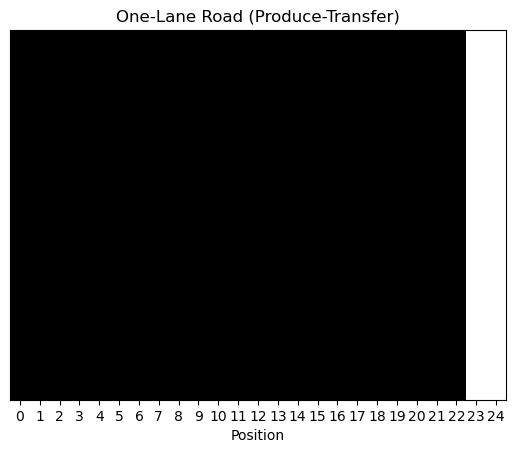

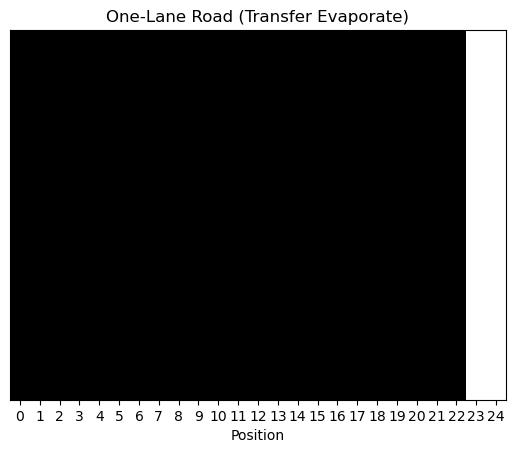

Cars:
ID: 46, Position: 21, Speed: 0
ID: 47, Position: 20, Speed: 0
ID: 48, Position: 19, Speed: 0
ID: 49, Position: 18, Speed: 0
ID: 50, Position: 17, Speed: 0
ID: 51, Position: 16, Speed: 0
ID: 52, Position: 15, Speed: 0
ID: 53, Position: 14, Speed: 0
ID: 54, Position: 13, Speed: 0
ID: 55, Position: 12, Speed: 0
ID: 56, Position: 11, Speed: 0
ID: 57, Position: 10, Speed: 0
ID: 58, Position: 9, Speed: 0
ID: 59, Position: 8, Speed: 0
ID: 60, Position: 7, Speed: 0
ID: 61, Position: 6, Speed: 0
ID: 62, Position: 5, Speed: 0
ID: 63, Position: 4, Speed: 0
ID: 64, Position: 3, Speed: 0
ID: 65, Position: 2, Speed: 0
ID: 66, Position: 1, Speed: 0
ID: 67, Position: 0, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 0
ID: 44, Position: 23, Speed: 1
ID: 45, Position: 22, Speed: 1
ID: 46, Position: 21, Speed: 1
ID: 47, Position: 2

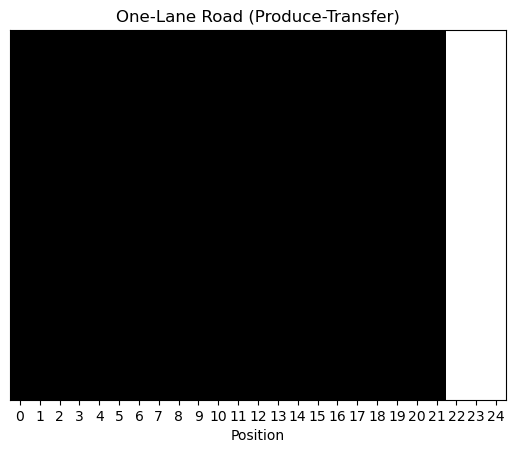

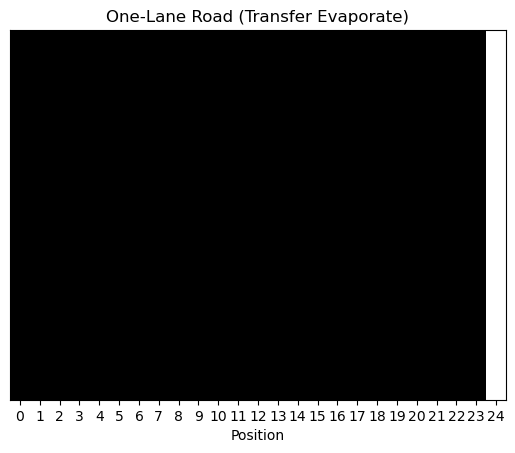

Cars:
ID: 46, Position: 22, Speed: 1
ID: 47, Position: 21, Speed: 1
ID: 48, Position: 20, Speed: 1
ID: 49, Position: 19, Speed: 1
ID: 50, Position: 18, Speed: 1
ID: 51, Position: 17, Speed: 1
ID: 52, Position: 16, Speed: 1
ID: 53, Position: 15, Speed: 1
ID: 54, Position: 14, Speed: 1
ID: 55, Position: 13, Speed: 1
ID: 56, Position: 12, Speed: 1
ID: 57, Position: 11, Speed: 1
ID: 58, Position: 10, Speed: 1
ID: 59, Position: 9, Speed: 1
ID: 60, Position: 8, Speed: 1
ID: 61, Position: 7, Speed: 1
ID: 62, Position: 6, Speed: 1
ID: 63, Position: 5, Speed: 1
ID: 64, Position: 4, Speed: 1
ID: 65, Position: 3, Speed: 1
ID: 66, Position: 2, Speed: 1
ID: 67, Position: 1, Speed: 1
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 0
ID: 75, Position: 0, Speed: 3
ID: 45, Position: 22, Speed: 0
ID: 46, Position: 21, Speed: 0
ID: 47, Position: 2

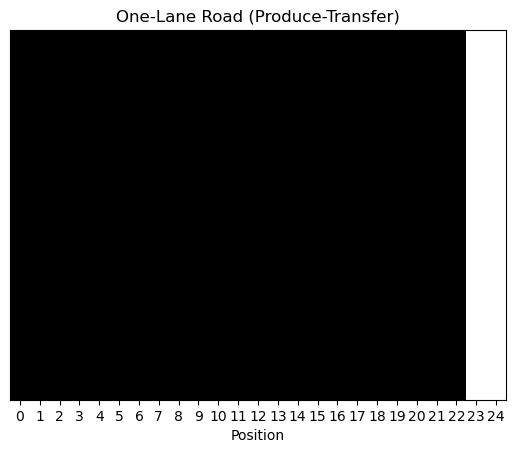

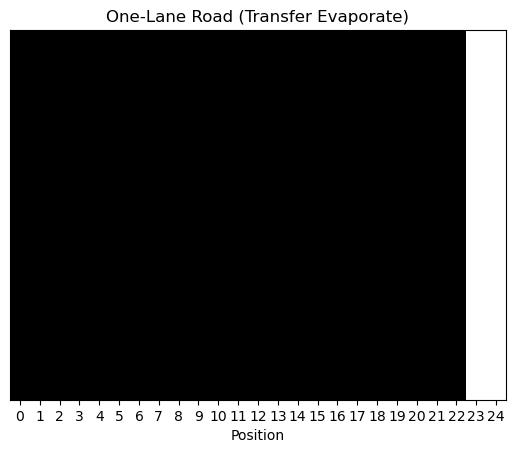

Cars:
ID: 47, Position: 21, Speed: 0
ID: 48, Position: 20, Speed: 0
ID: 49, Position: 19, Speed: 0
ID: 50, Position: 18, Speed: 0
ID: 51, Position: 17, Speed: 0
ID: 52, Position: 16, Speed: 0
ID: 53, Position: 15, Speed: 0
ID: 54, Position: 14, Speed: 0
ID: 55, Position: 13, Speed: 0
ID: 56, Position: 12, Speed: 0
ID: 57, Position: 11, Speed: 0
ID: 58, Position: 10, Speed: 0
ID: 59, Position: 9, Speed: 0
ID: 60, Position: 8, Speed: 0
ID: 61, Position: 7, Speed: 0
ID: 62, Position: 6, Speed: 0
ID: 63, Position: 5, Speed: 0
ID: 64, Position: 4, Speed: 0
ID: 65, Position: 3, Speed: 0
ID: 66, Position: 2, Speed: 0
ID: 67, Position: 1, Speed: 0
ID: 68, Position: 0, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 0
ID: 75, Position: 0, Speed: 0
ID: 76, Position: 0, Speed: 1
ID: 45, Position: 23, Speed: 1
ID: 46, Position: 22, Speed: 1
ID: 47, Position: 21

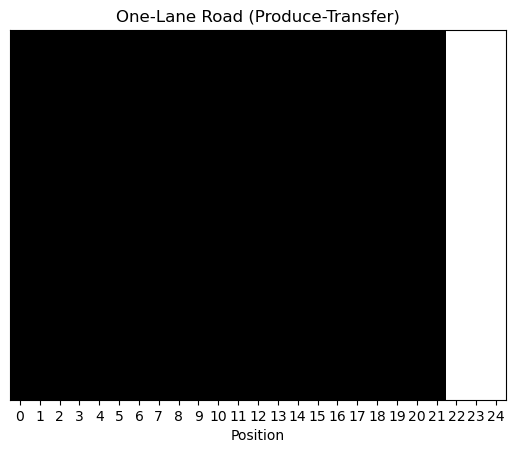

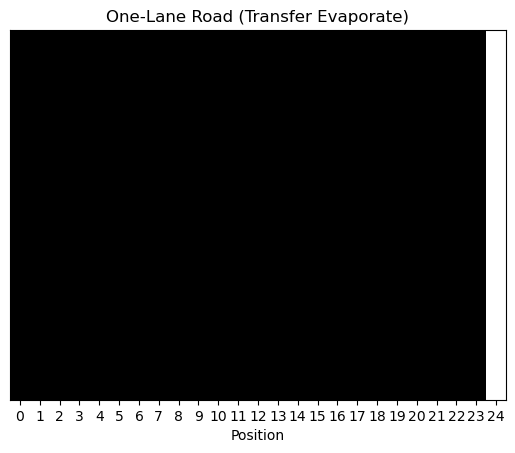

Cars:
ID: 47, Position: 22, Speed: 1
ID: 48, Position: 21, Speed: 1
ID: 49, Position: 20, Speed: 1
ID: 50, Position: 19, Speed: 1
ID: 51, Position: 18, Speed: 1
ID: 52, Position: 17, Speed: 1
ID: 53, Position: 16, Speed: 1
ID: 54, Position: 15, Speed: 1
ID: 55, Position: 14, Speed: 1
ID: 56, Position: 13, Speed: 1
ID: 57, Position: 12, Speed: 1
ID: 58, Position: 11, Speed: 1
ID: 59, Position: 10, Speed: 1
ID: 60, Position: 9, Speed: 1
ID: 61, Position: 8, Speed: 1
ID: 62, Position: 7, Speed: 1
ID: 63, Position: 6, Speed: 1
ID: 64, Position: 5, Speed: 1
ID: 65, Position: 4, Speed: 1
ID: 66, Position: 3, Speed: 1
ID: 67, Position: 2, Speed: 1
ID: 68, Position: 1, Speed: 1
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 0
ID: 75, Position: 0, Speed: 0
ID: 76, Position: 0, Speed: 0
ID: 77, Position: 0, Speed: 3
ID: 46, Position: 22, Speed: 0
ID: 47, Position: 21

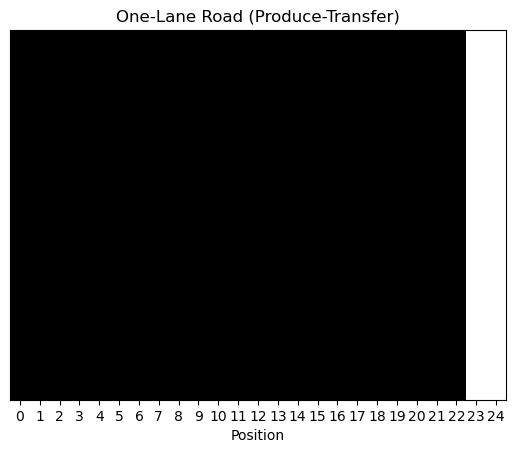

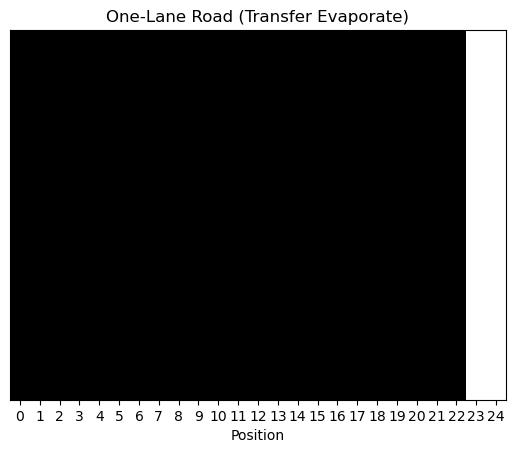

Cars:
ID: 48, Position: 21, Speed: 0
ID: 49, Position: 20, Speed: 0
ID: 50, Position: 19, Speed: 0
ID: 51, Position: 18, Speed: 0
ID: 52, Position: 17, Speed: 0
ID: 53, Position: 16, Speed: 0
ID: 54, Position: 15, Speed: 0
ID: 55, Position: 14, Speed: 0
ID: 56, Position: 13, Speed: 0
ID: 57, Position: 12, Speed: 0
ID: 58, Position: 11, Speed: 0
ID: 59, Position: 10, Speed: 0
ID: 60, Position: 9, Speed: 0
ID: 61, Position: 8, Speed: 0
ID: 62, Position: 7, Speed: 0
ID: 63, Position: 6, Speed: 0
ID: 64, Position: 5, Speed: 0
ID: 65, Position: 4, Speed: 0
ID: 66, Position: 3, Speed: 0
ID: 67, Position: 2, Speed: 0
ID: 68, Position: 1, Speed: 0
ID: 69, Position: 0, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 0
ID: 75, Position: 0, Speed: 0
ID: 76, Position: 0, Speed: 0
ID: 77, Position: 0, Speed: 0
ID: 78, Position: 0, Speed: 3
ID: 46, Position: 23, Speed: 1
ID: 47, Position: 22,

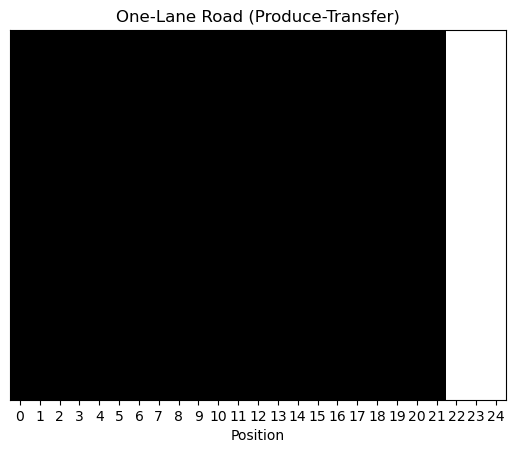

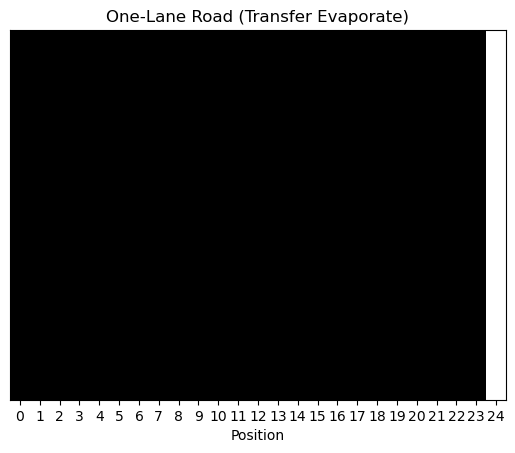

Cars:
ID: 48, Position: 22, Speed: 1
ID: 49, Position: 21, Speed: 1
ID: 50, Position: 20, Speed: 1
ID: 51, Position: 19, Speed: 1
ID: 52, Position: 18, Speed: 1
ID: 53, Position: 17, Speed: 1
ID: 54, Position: 16, Speed: 1
ID: 55, Position: 15, Speed: 1
ID: 56, Position: 14, Speed: 1
ID: 57, Position: 13, Speed: 1
ID: 58, Position: 12, Speed: 1
ID: 59, Position: 11, Speed: 1
ID: 60, Position: 10, Speed: 1
ID: 61, Position: 9, Speed: 1
ID: 62, Position: 8, Speed: 1
ID: 63, Position: 7, Speed: 1
ID: 64, Position: 6, Speed: 1
ID: 65, Position: 5, Speed: 1
ID: 66, Position: 4, Speed: 1
ID: 67, Position: 3, Speed: 1
ID: 68, Position: 2, Speed: 1
ID: 69, Position: 1, Speed: 1
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 0
ID: 75, Position: 0, Speed: 0
ID: 76, Position: 0, Speed: 0
ID: 77, Position: 0, Speed: 0
ID: 78, Position: 0, Speed: 0
ID: 79, Position: 0, Speed: 4
ID: 47, Position: 22,

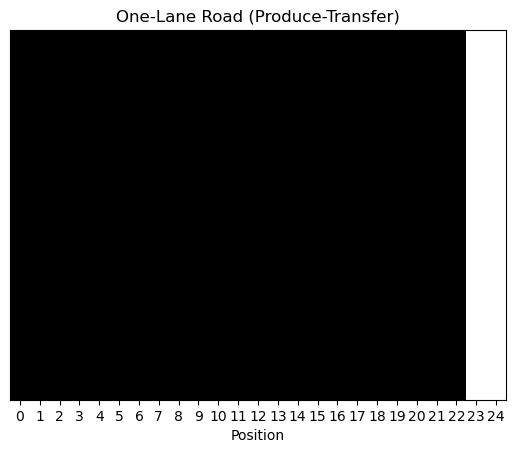

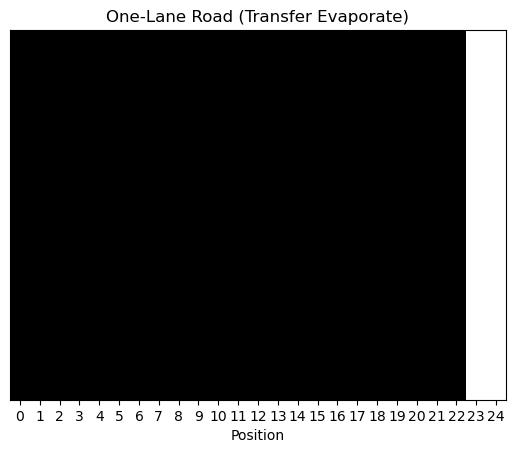

Cars:
ID: 49, Position: 21, Speed: 0
ID: 50, Position: 20, Speed: 0
ID: 51, Position: 19, Speed: 0
ID: 52, Position: 18, Speed: 0
ID: 53, Position: 17, Speed: 0
ID: 54, Position: 16, Speed: 0
ID: 55, Position: 15, Speed: 0
ID: 56, Position: 14, Speed: 0
ID: 57, Position: 13, Speed: 0
ID: 58, Position: 12, Speed: 0
ID: 59, Position: 11, Speed: 0
ID: 60, Position: 10, Speed: 0
ID: 61, Position: 9, Speed: 0
ID: 62, Position: 8, Speed: 0
ID: 63, Position: 7, Speed: 0
ID: 64, Position: 6, Speed: 0
ID: 65, Position: 5, Speed: 0
ID: 66, Position: 4, Speed: 0
ID: 67, Position: 3, Speed: 0
ID: 68, Position: 2, Speed: 0
ID: 69, Position: 1, Speed: 0
ID: 70, Position: 0, Speed: 0
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 0
ID: 75, Position: 0, Speed: 0
ID: 76, Position: 0, Speed: 0
ID: 77, Position: 0, Speed: 0
ID: 78, Position: 0, Speed: 0
ID: 79, Position: 0, Speed: 0
ID: 80, Position: 0, Speed: 3
ID: 47, Position: 23, 

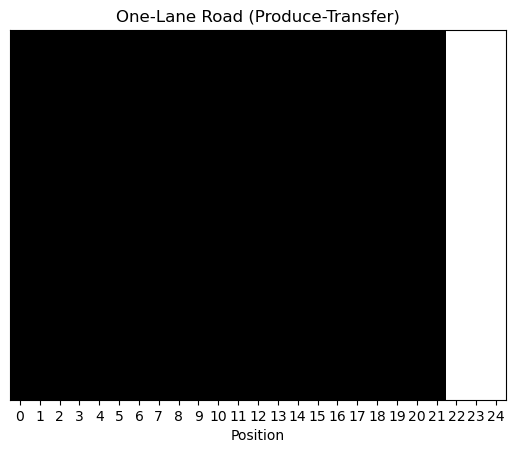

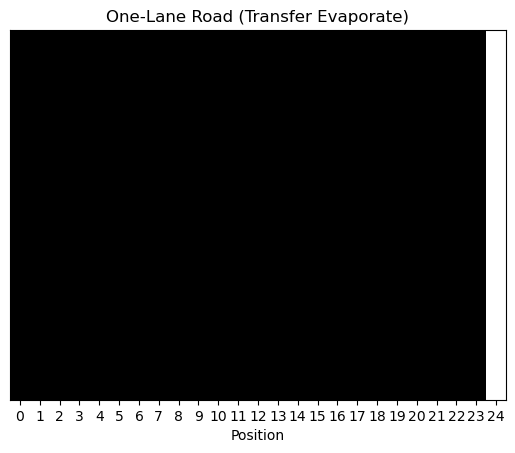

Cars:
ID: 49, Position: 22, Speed: 1
ID: 50, Position: 21, Speed: 1
ID: 51, Position: 20, Speed: 1
ID: 52, Position: 19, Speed: 1
ID: 53, Position: 18, Speed: 1
ID: 54, Position: 17, Speed: 1
ID: 55, Position: 16, Speed: 1
ID: 56, Position: 15, Speed: 1
ID: 57, Position: 14, Speed: 1
ID: 58, Position: 13, Speed: 1
ID: 59, Position: 12, Speed: 1
ID: 60, Position: 11, Speed: 1
ID: 61, Position: 10, Speed: 1
ID: 62, Position: 9, Speed: 1
ID: 63, Position: 8, Speed: 1
ID: 64, Position: 7, Speed: 1
ID: 65, Position: 6, Speed: 1
ID: 66, Position: 5, Speed: 1
ID: 67, Position: 4, Speed: 1
ID: 68, Position: 3, Speed: 1
ID: 69, Position: 2, Speed: 1
ID: 70, Position: 1, Speed: 1
ID: 71, Position: 0, Speed: 0
ID: 72, Position: 0, Speed: 0
ID: 73, Position: 0, Speed: 0
ID: 74, Position: 0, Speed: 0
ID: 75, Position: 0, Speed: 0
ID: 76, Position: 0, Speed: 0
ID: 77, Position: 0, Speed: 0
ID: 78, Position: 0, Speed: 0
ID: 79, Position: 0, Speed: 0
ID: 80, Position: 0, Speed: 0
ID: 81, Position: 0, 

In [11]:
#Iterate over N timesteps
N=50
for i in range(N):
    print("Time step:", i+1)
    road_1.visualize()
    road_1.update()
    road_2.visualize()
    road_2.update()

    #Access information of each vehicle
    print("Cars:")
    for car in road_1.cars:
        print(f"ID: {car.car_id}, Position: {car.position}, Speed: {car.speed}")
    for car in road_2.cars:
        print(f"ID: {car.car_id}, Position: {car.position}, Speed: {car.speed}")

    print()